In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from rcgp.rcgp import GPRegressor, RCGPRegressor
from rcgp.kernels import ConstantMean, RBFKernel, LinearMean
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,         
    "font.family": "serif",       
    "text.latex.preamble": r"\usepackage{amsmath}",
    'font.size': 24,         
    'axes.labelsize': 24,    
    'xtick.labelsize': 24,   
    'ytick.labelsize': 24,  
    'legend.fontsize': 20,
    'lines.linewidth': 4,    
    'lines.markersize': 5   
})

35


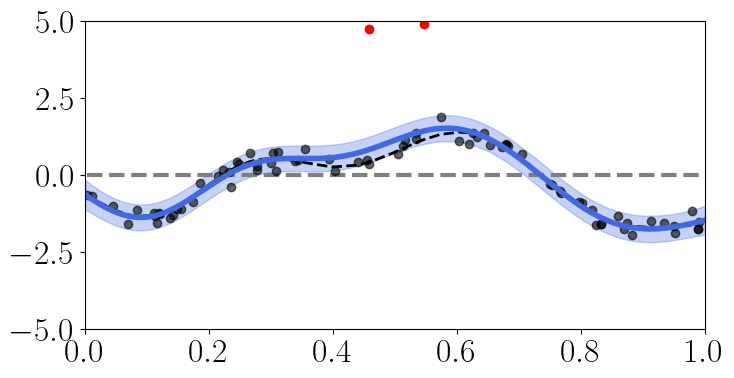

36


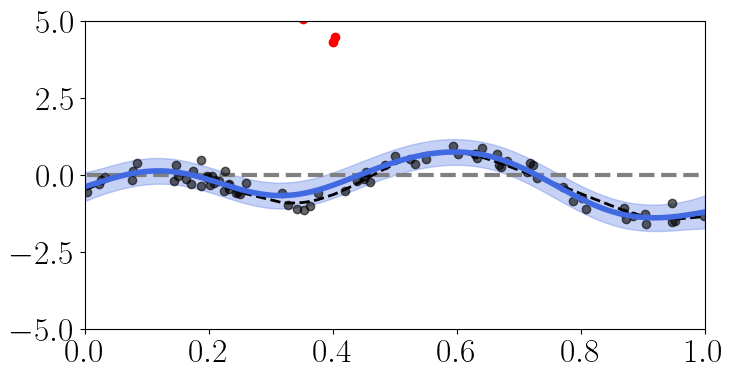

37


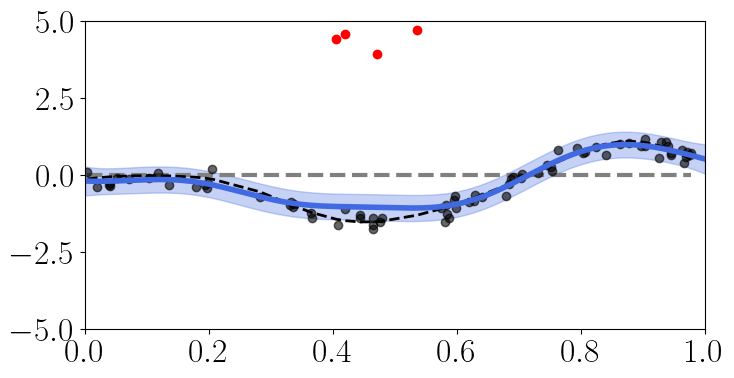

38


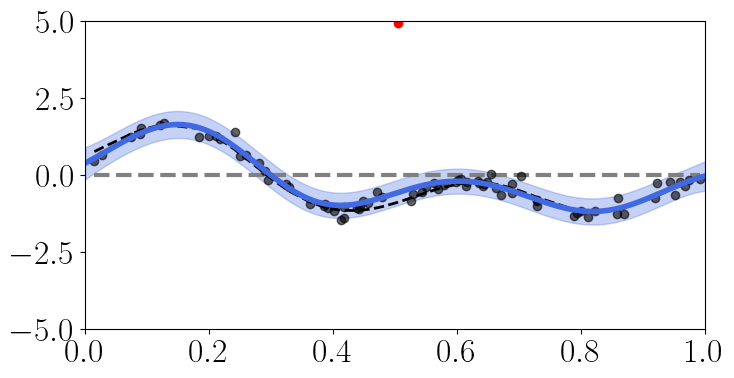

39


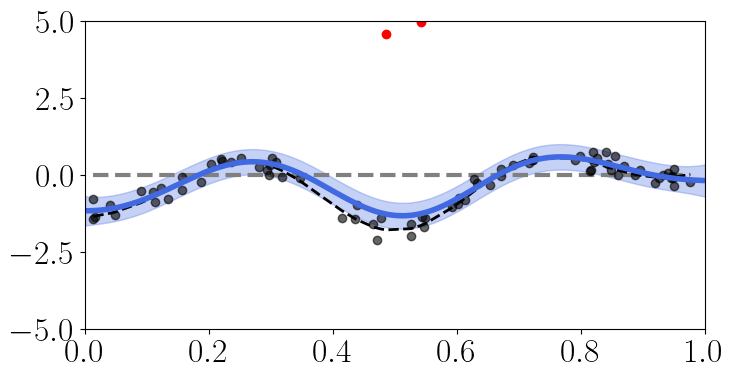

40


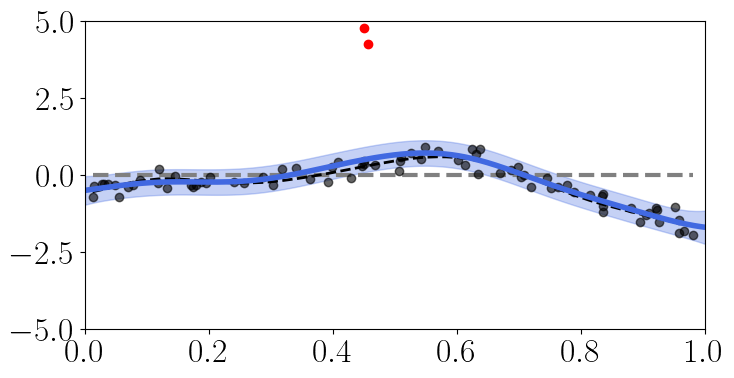

41


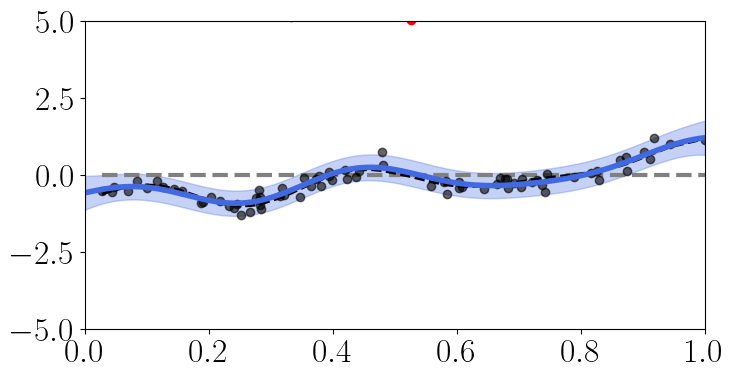

42


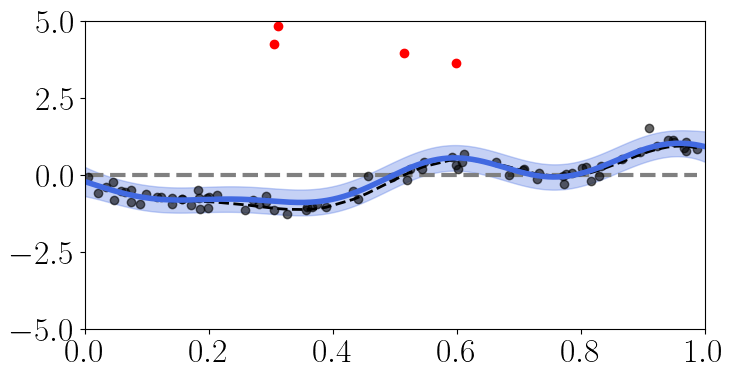

43


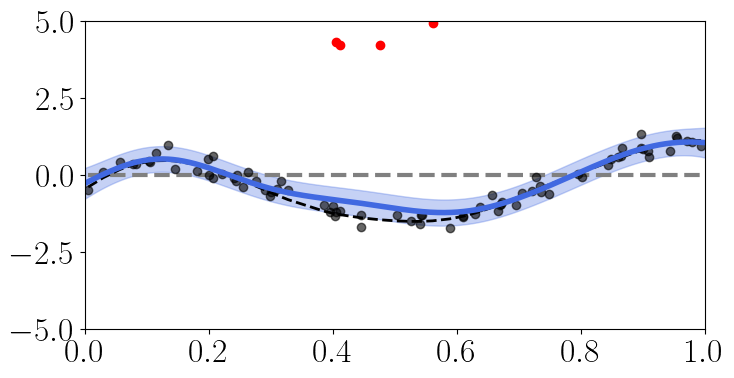

44


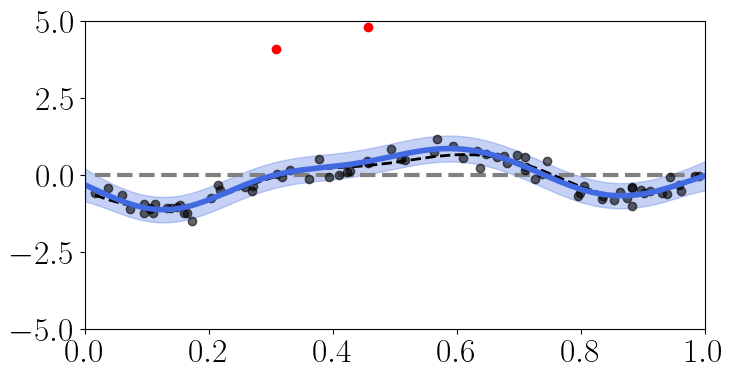

45


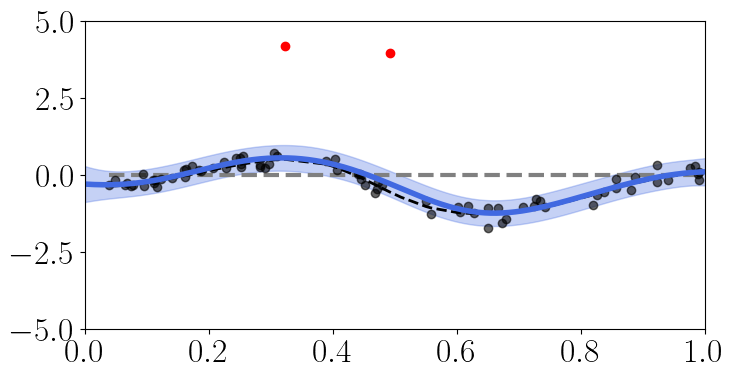

46


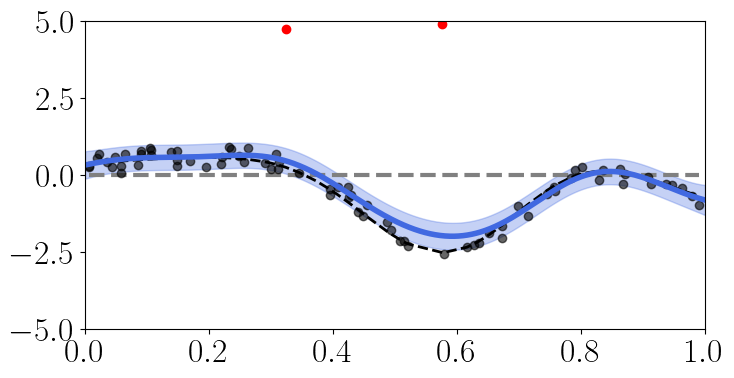

47


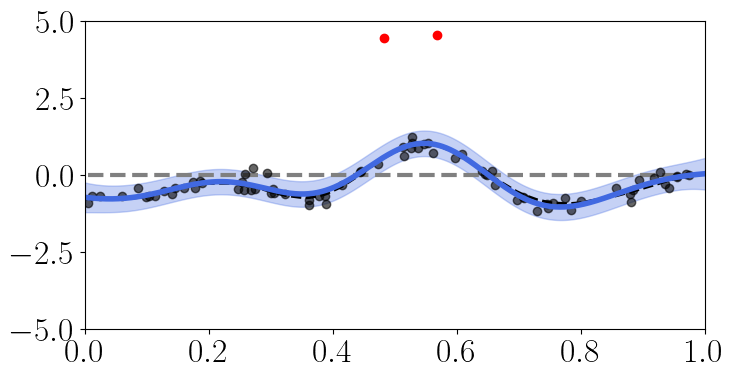

48


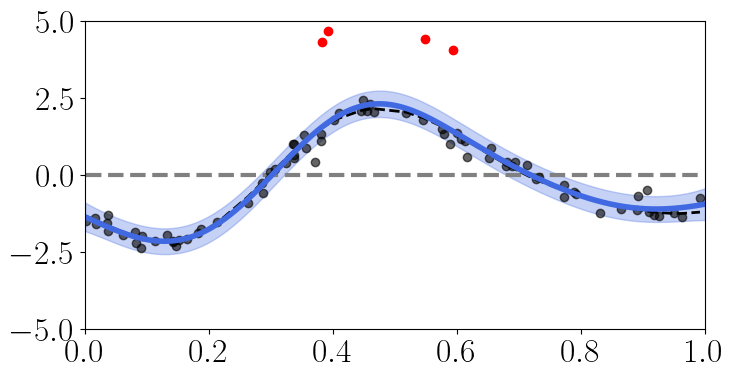

49


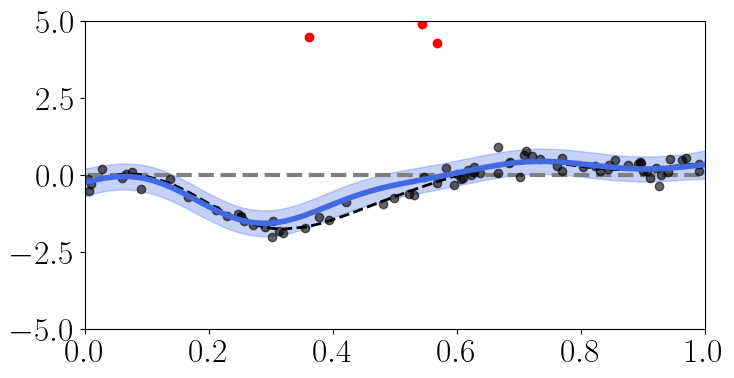

50


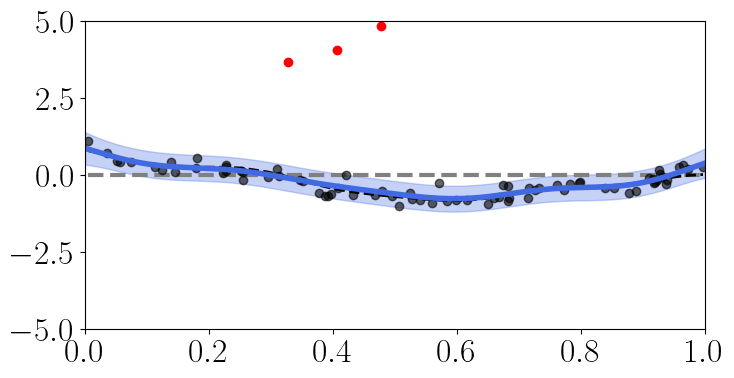

51


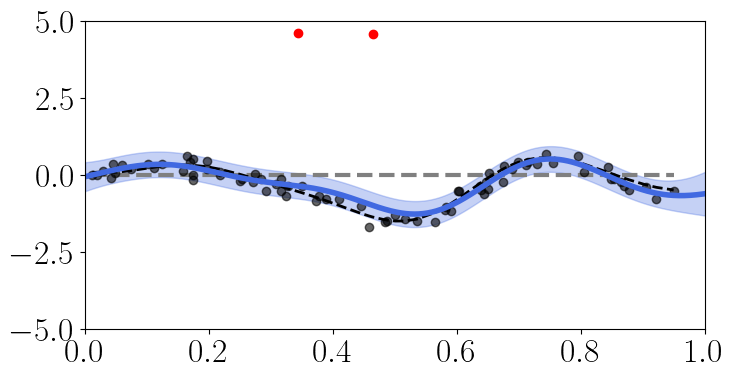

52


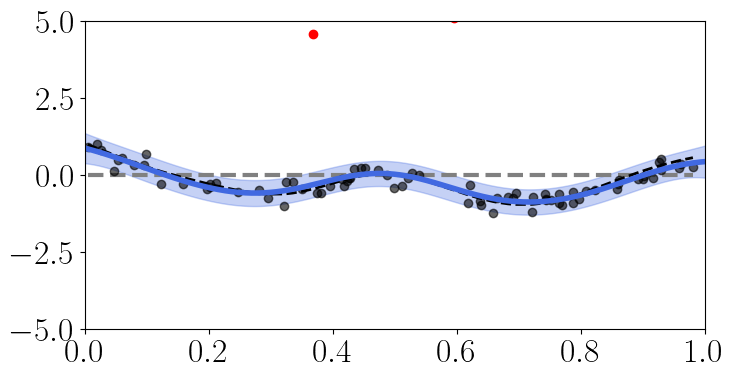

53


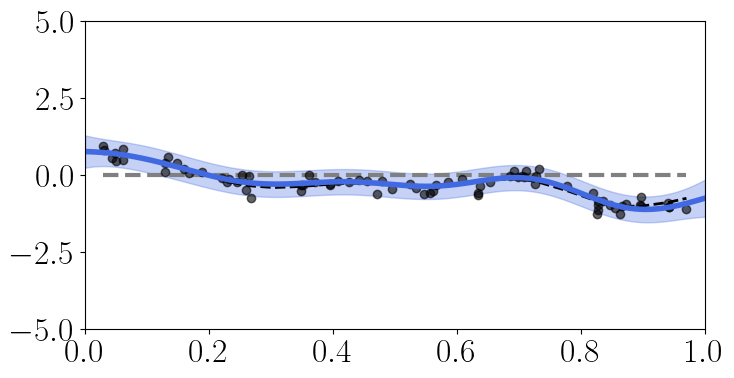

54


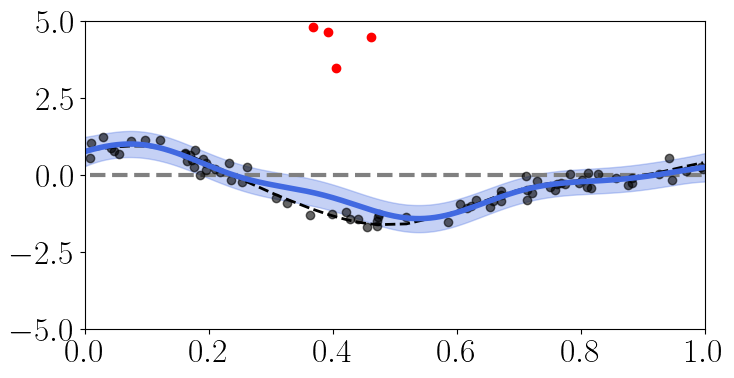

55


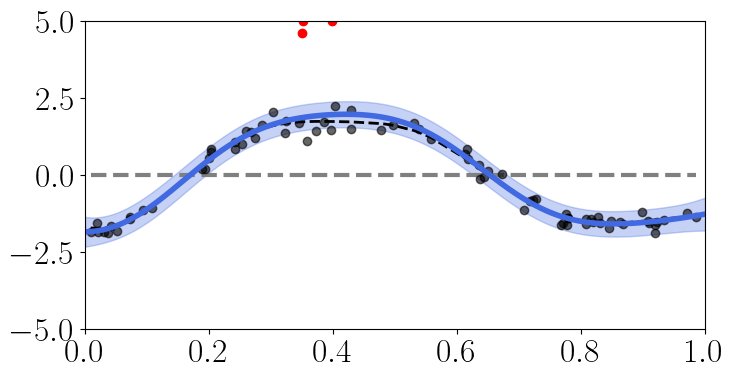

56


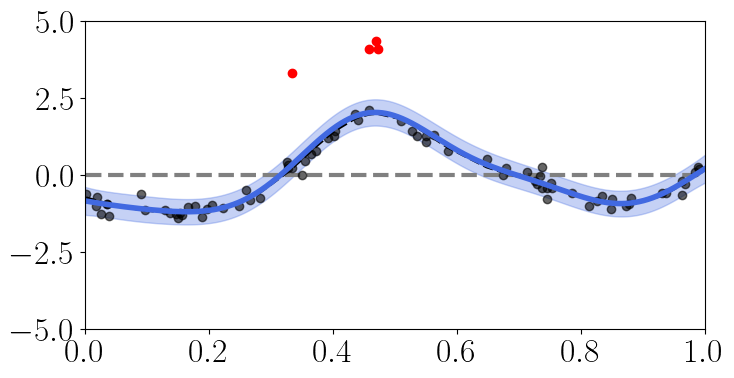

57


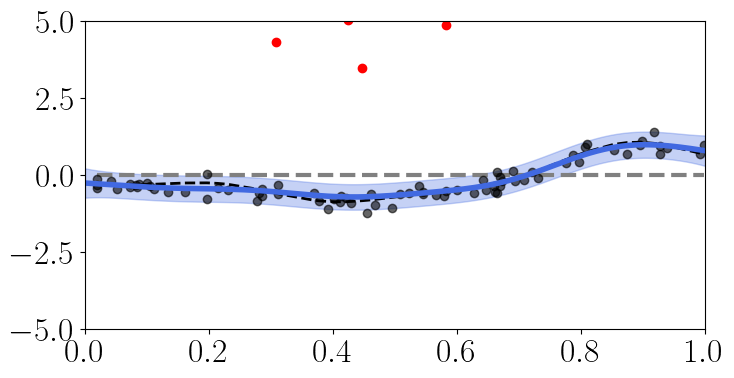

58


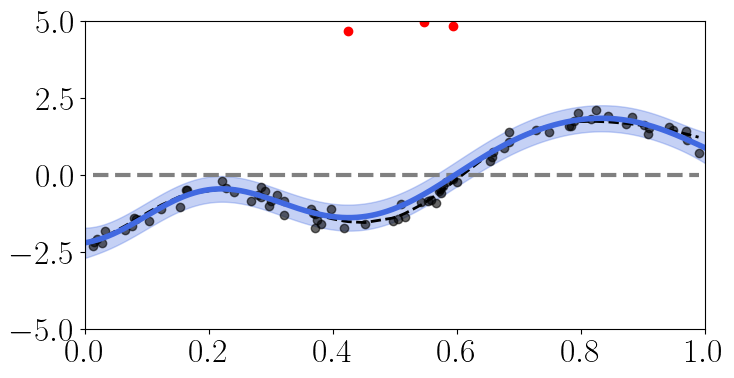

59


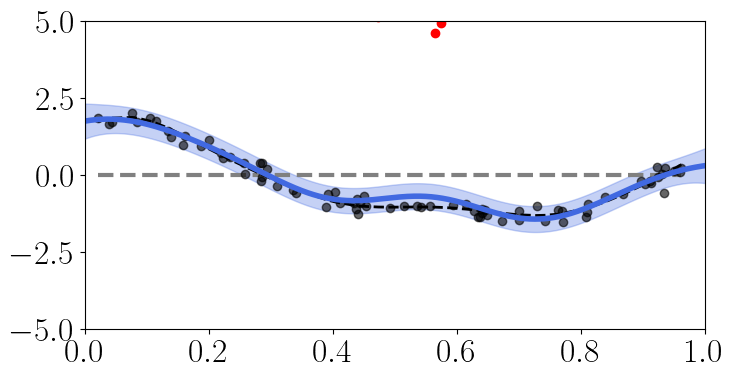

60


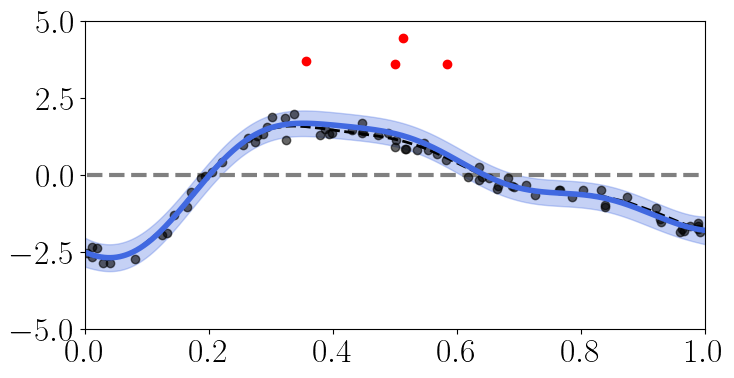

61


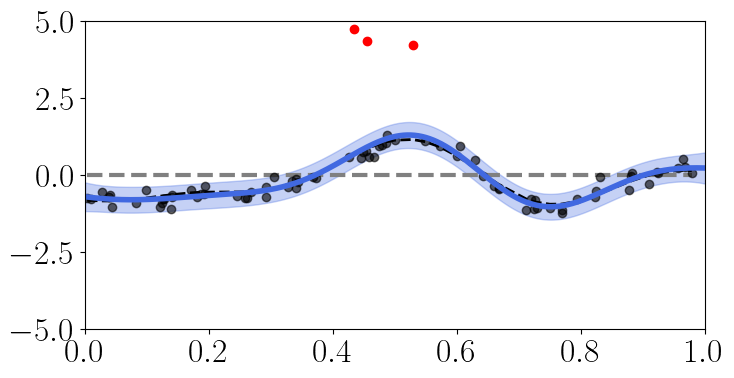

62


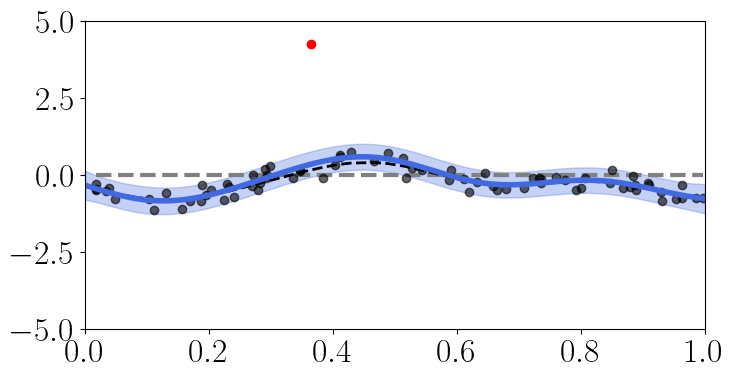

63


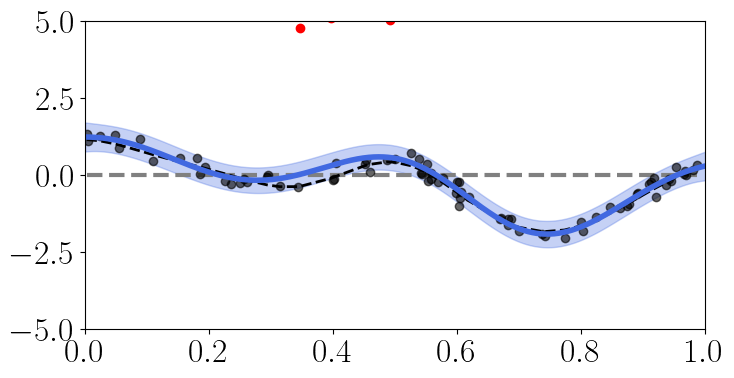

64


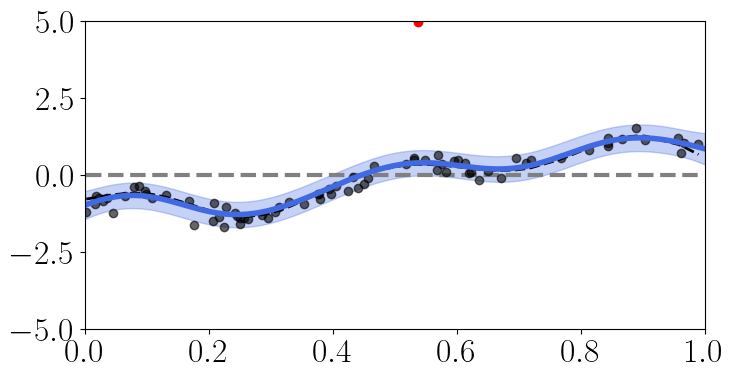

65


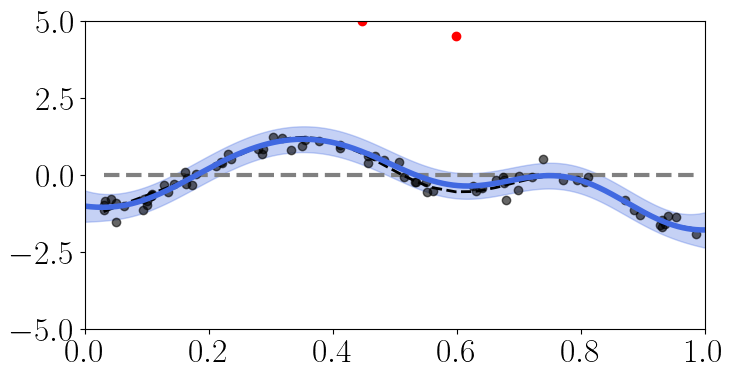

66


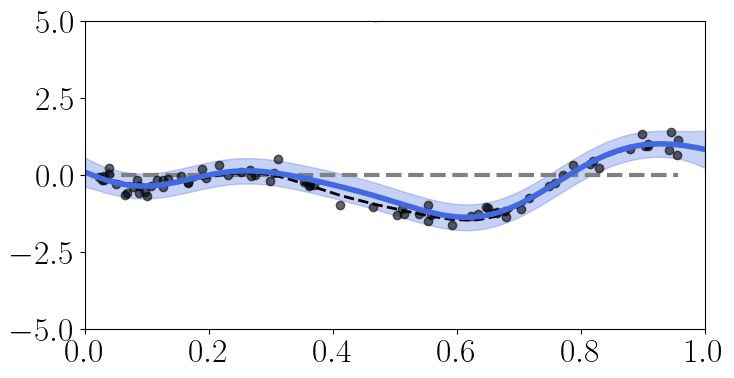

67


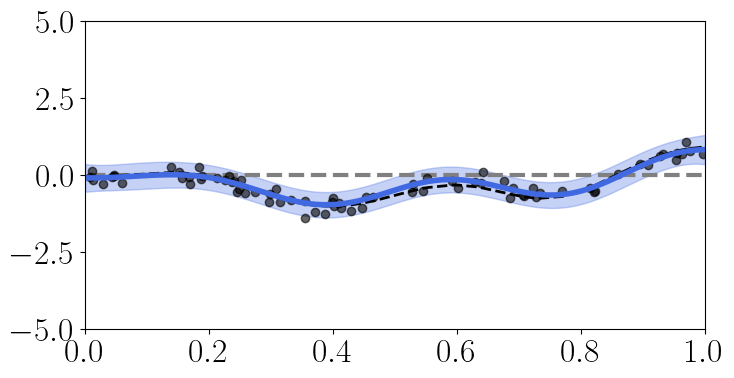

68


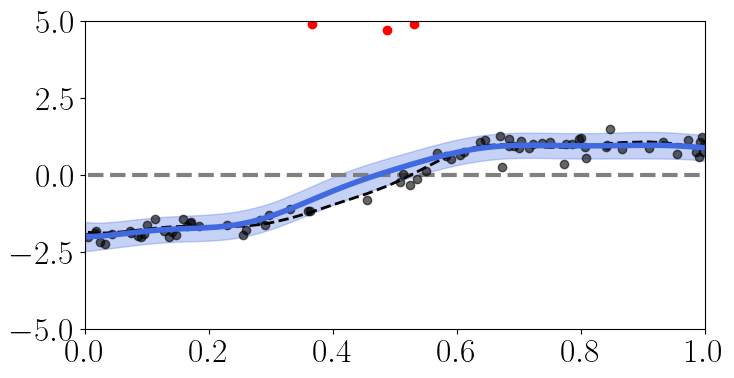

69


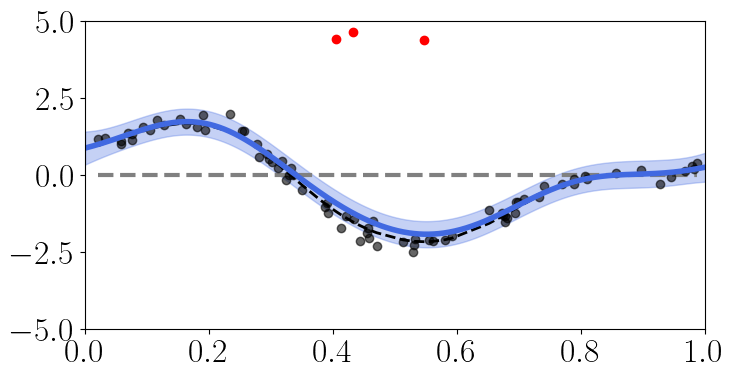

70


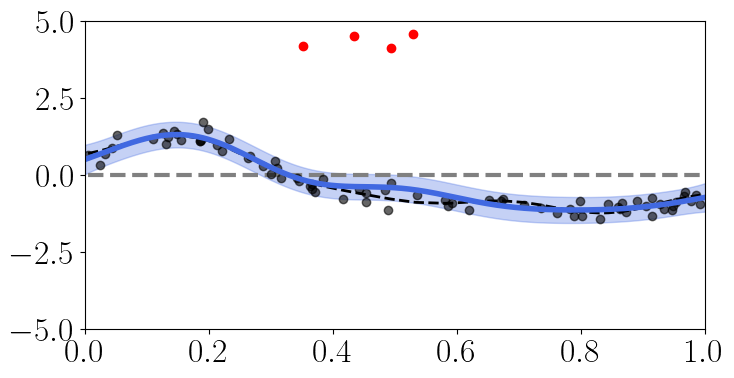

71


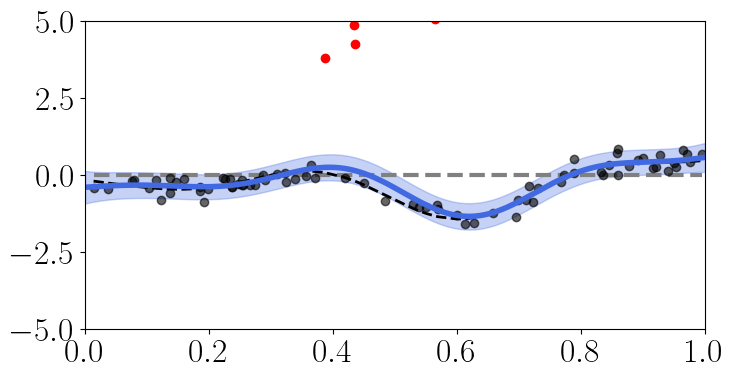

72


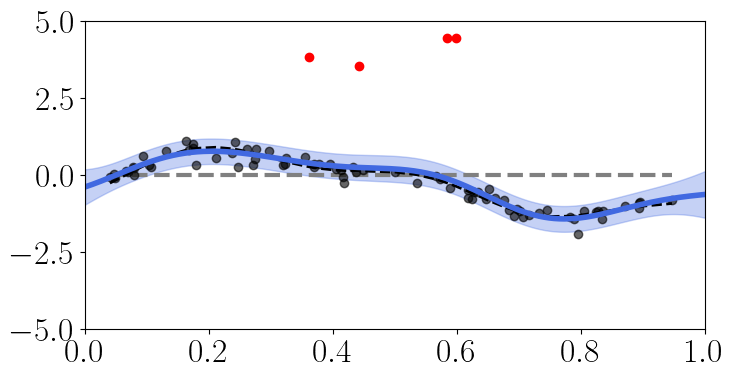

73


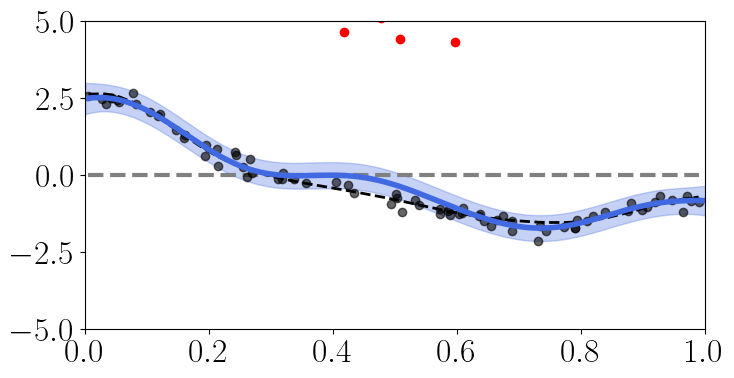

74


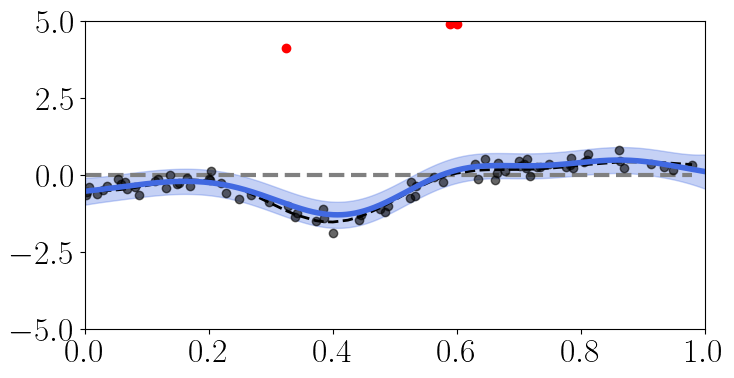

75


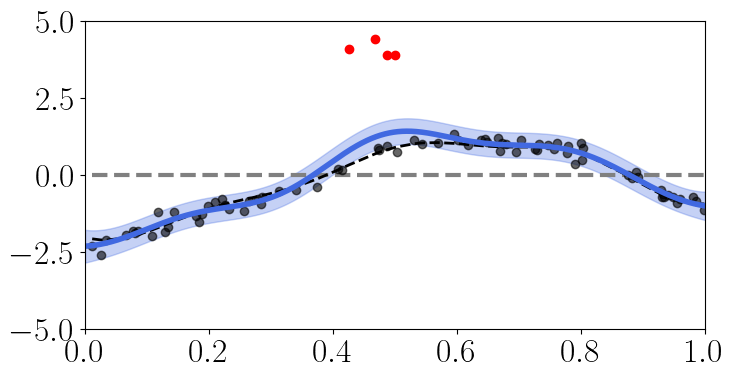

76


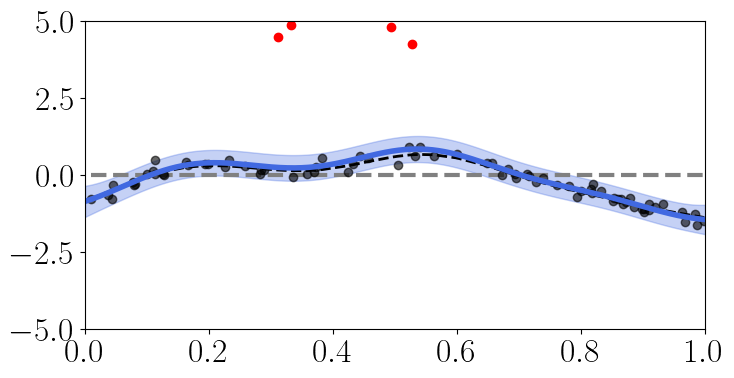

77


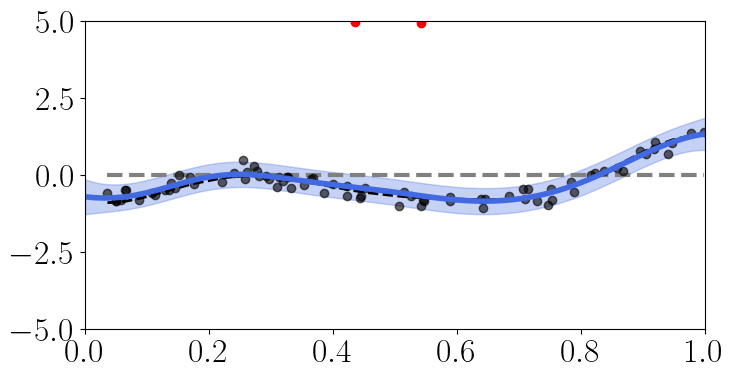

78


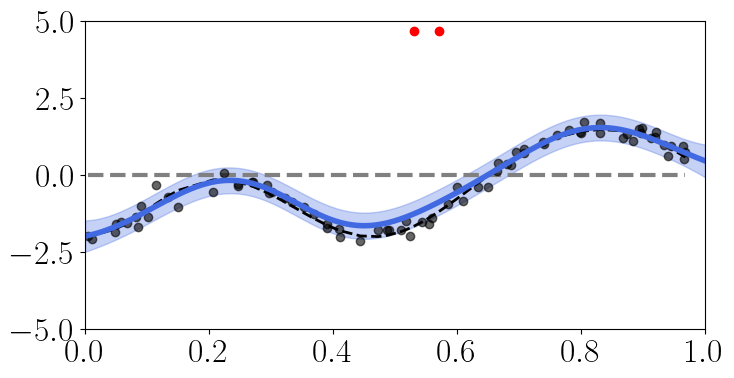

79


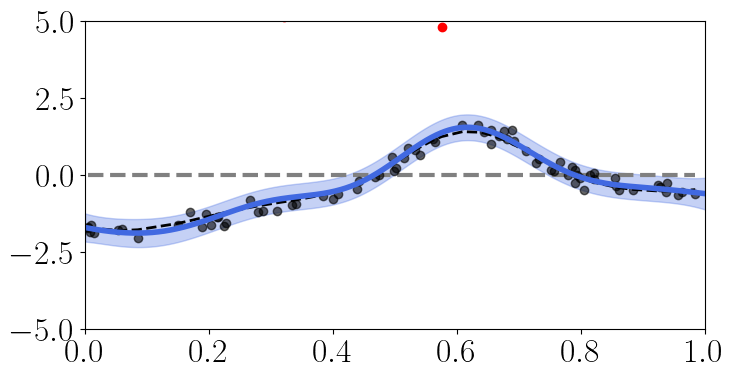

80


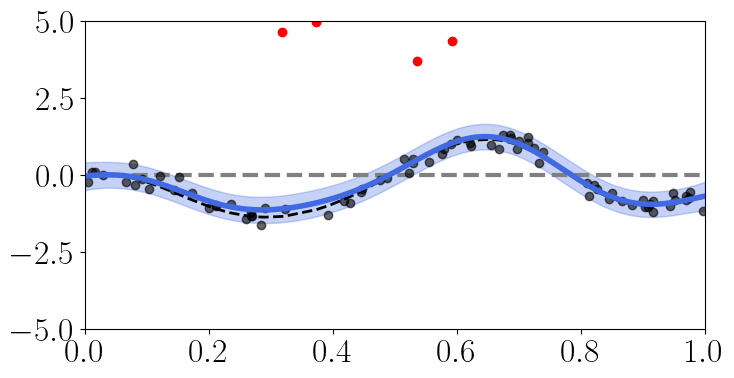

81


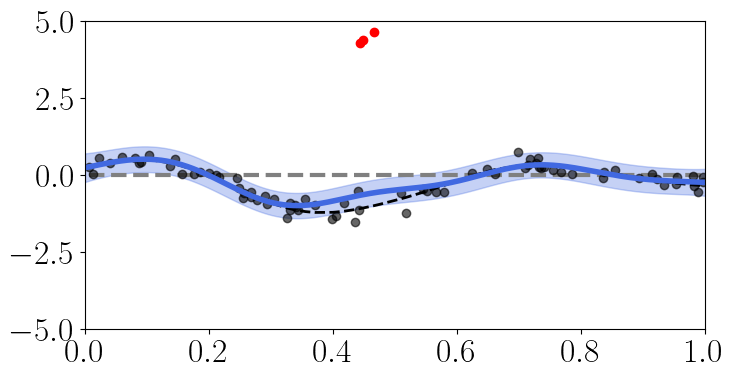

82


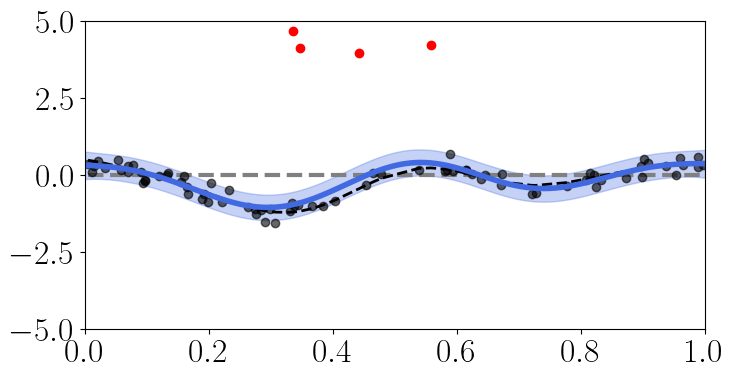

83


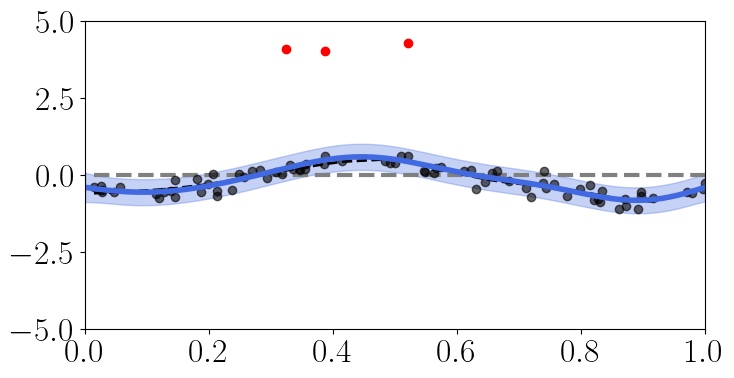

84


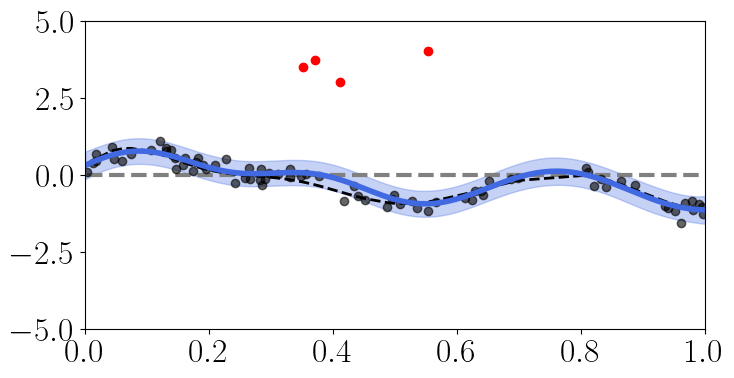

85


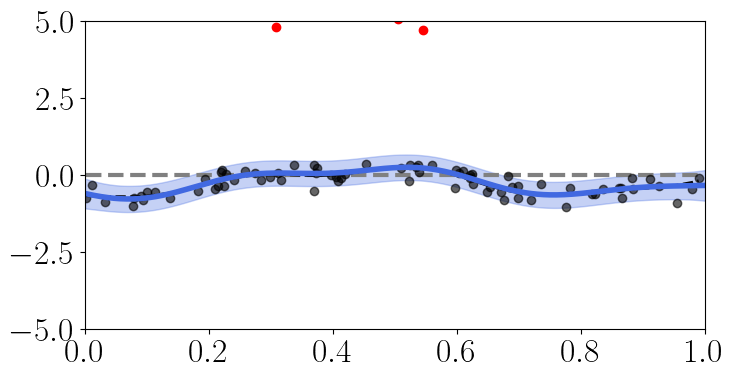

86


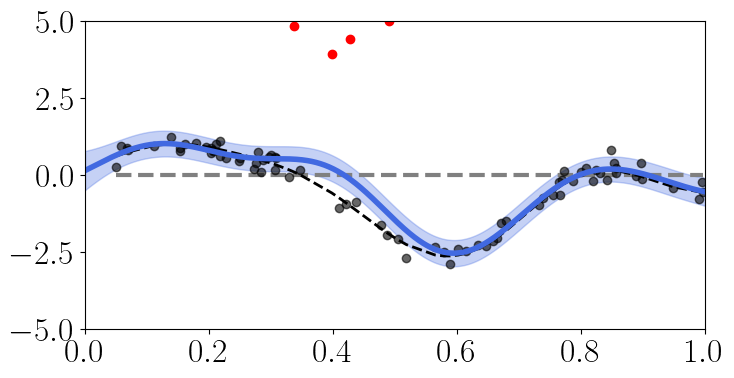

87


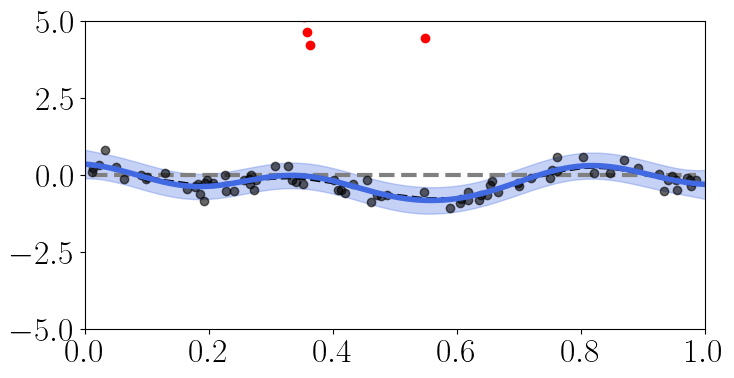

88


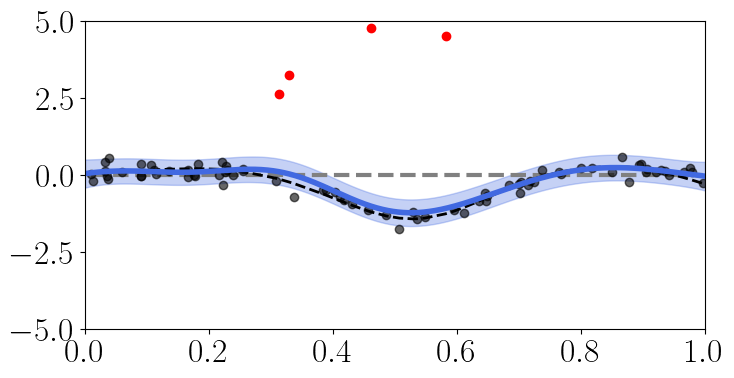

89


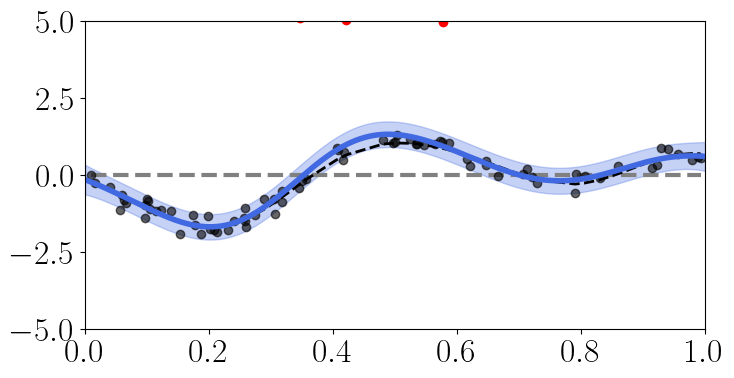

90


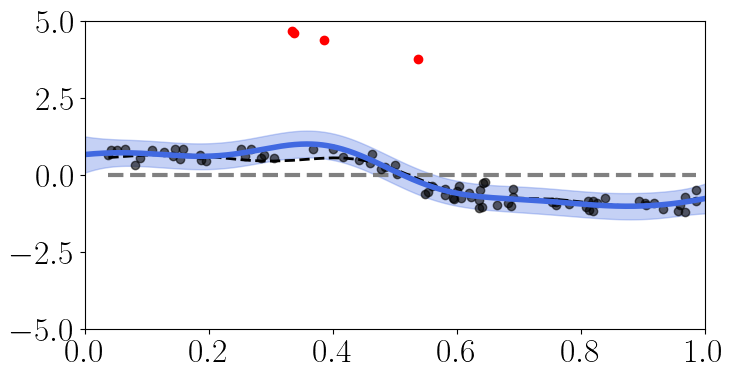

91


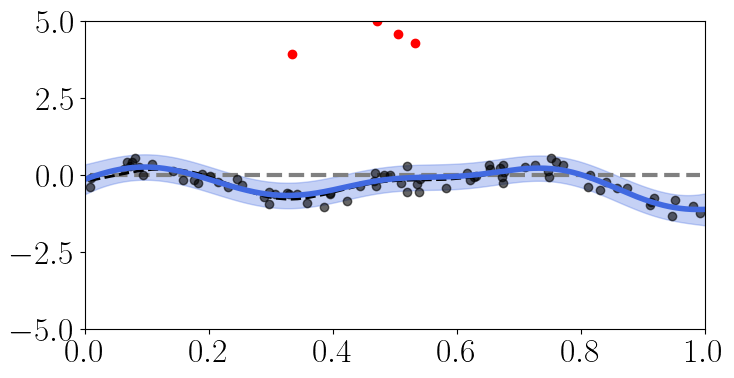

92


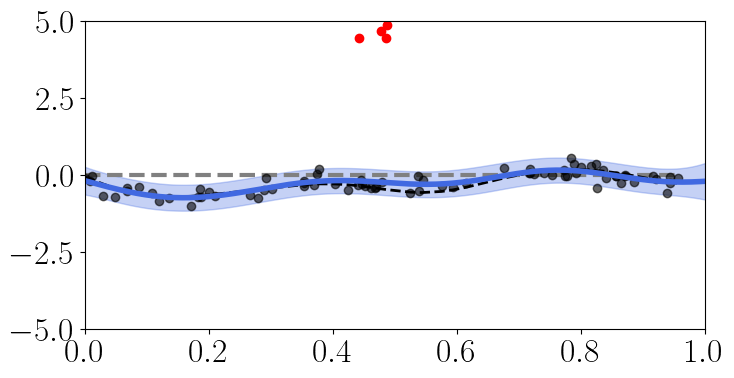

93


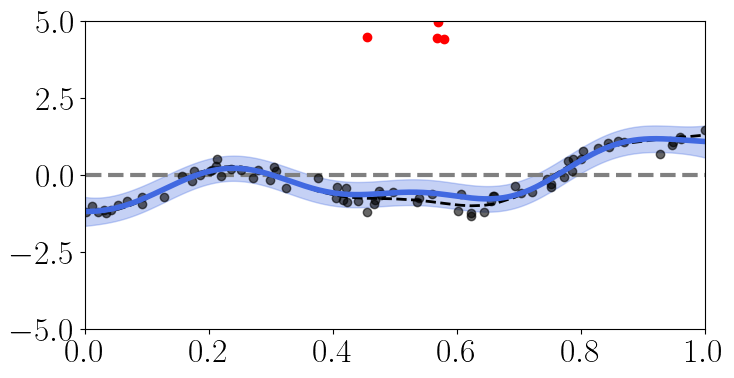

94


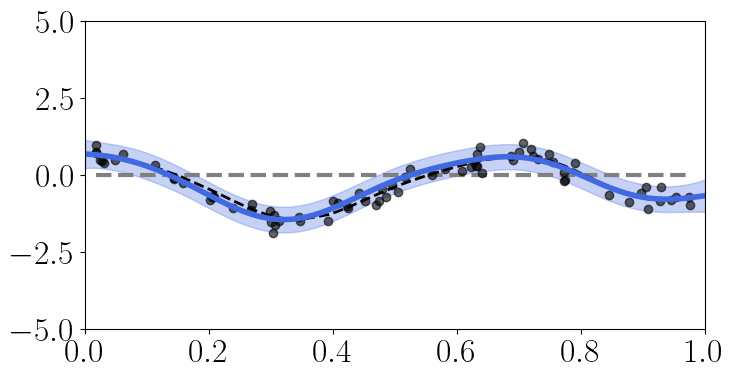

95


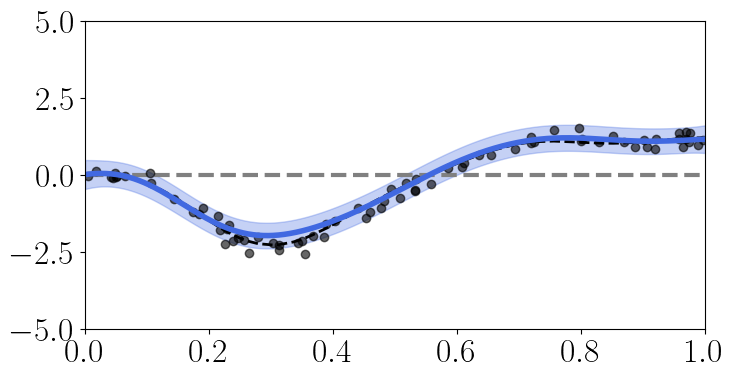

96


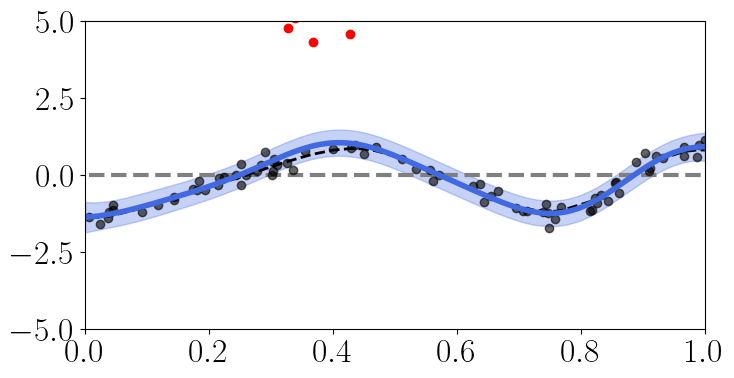

97


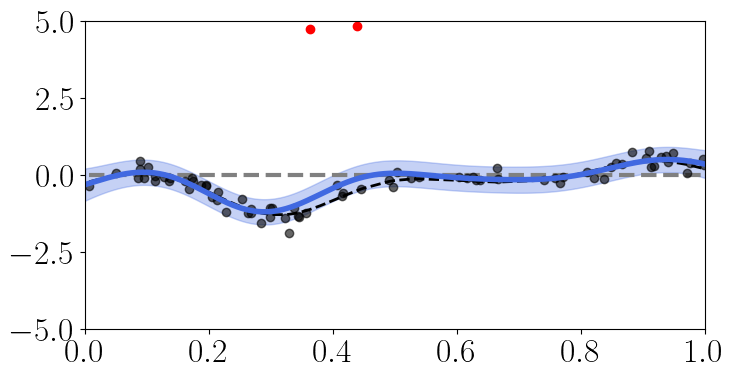

98


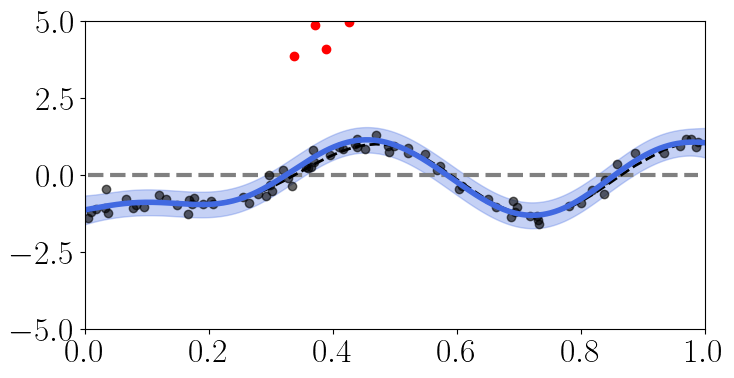

99


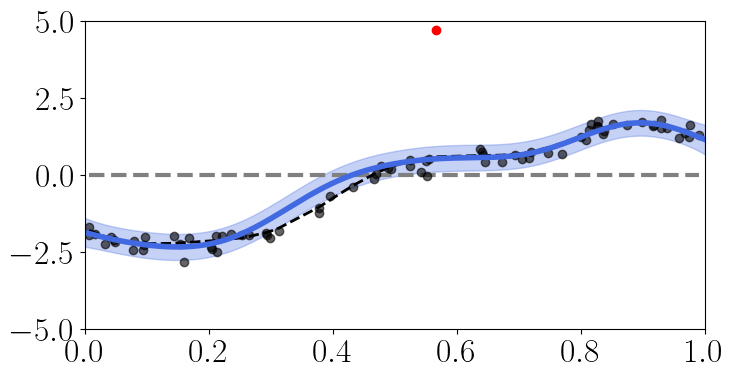

In [164]:
for i in range(35, 100):
    np.random.seed(i)
    print(i)
    # Initialisation
    epsilon = 0.05
    n_points = 80
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    # Add outliers
    outlier_range = np.where((x_train >= 0.3) & (x_train <= 0.60))[0]
    outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
    outlier_values = np.random.normal(loc=5, scale=0.5, size=outlier_indices.shape[0])
    y_train[outlier_indices] = outlier_values.reshape(-1,1)
    # print(outlier_indices)

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    prior_mean = ConstantMean(constant=0)
    rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_true.fit(x_train, y_train)

    mu_true, var_true = rcgp_true.predict(x_test)
    std_true = np.sqrt(var_true + rcgp_true.noise)

    plt.figure(figsize=(8, 4))
    plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    plt.plot(x_test, mu_true.ravel(), color="royalblue")
    plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

    # # Plot
    # plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    # plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
    # plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
    # plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

    plt.ylim(-5, 5)
    plt.xlim(0, 1)
    plt.show()

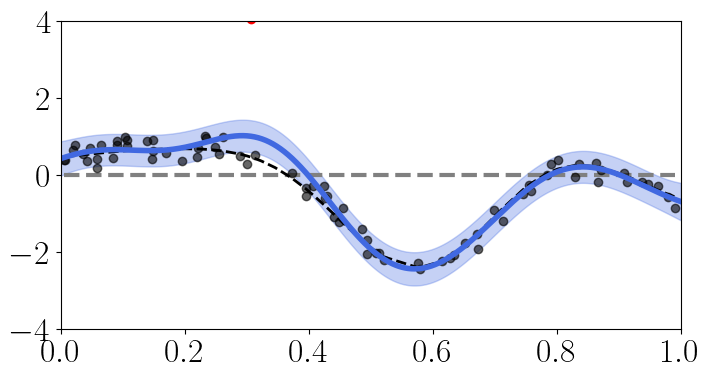

In [ ]:
np.random.seed(46) # 38, 45, 46, 63
# Initialisation
epsilon = 0.05
n_points = 80
length_scale = 0.15
variance = 1
noise_variance = 0.04

# Simulation
mean_func = ConstantMean(constant=0)
rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
K_train = rbf_kernel(x_train, x_train)
f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

# Add outliers
outlier_range = np.where((x_train >= 0.3) & (x_train <= 0.4))[0]
outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
outlier_values = np.random.normal(loc=4, scale=0.4, size=outlier_indices.shape[0])
y_train[outlier_indices] = outlier_values.reshape(-1,1)
# print(outlier_indices)

mean_y_train = np.mean(y_train)
# print(mean_y_train)
y_train = y_train - mean_y_train

# Mask to keep all indices that are NOT outliers
mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

prior_mean = ConstantMean(constant=0)
rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
rcgp_true.fit(x_train, y_train)

mu_true, var_true = rcgp_true.predict(x_test)
std_true = np.sqrt(var_true + rcgp_true.noise)

plt.figure(figsize=(8, 4))
plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
plt.plot(x_test, mu_true.ravel(), color="royalblue")
plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

# # Plot
# plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
# plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
# plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
# plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

plt.ylim(-4, 4)
plt.xlim(0, 1)
plt.show()

Optimized length_scale: 0.0339, noise: 0.162567, rbf_variance: 0.9180
Optimized length_scale: 0.1359, noise: 0.134151, rbf_variance: 0.3848
loo_log: [-0.29269871 -0.27533324 -0.32549147 -0.27125872 -0.27390642 -0.2578766
 -0.18247572 -0.14338567 -0.6400981  -0.27669093 -0.35595395 -0.02284519
 -0.04529848 -0.03793305 -0.03905321 -0.37013504 -0.44817637 -0.1675626
 -0.07902058 -0.14578872 -0.40466896 -0.00561707 -0.03860761 -0.0497078
 -0.01900809 -0.0334912  -0.07063045 -0.12193532 -0.60203866]
weights: []


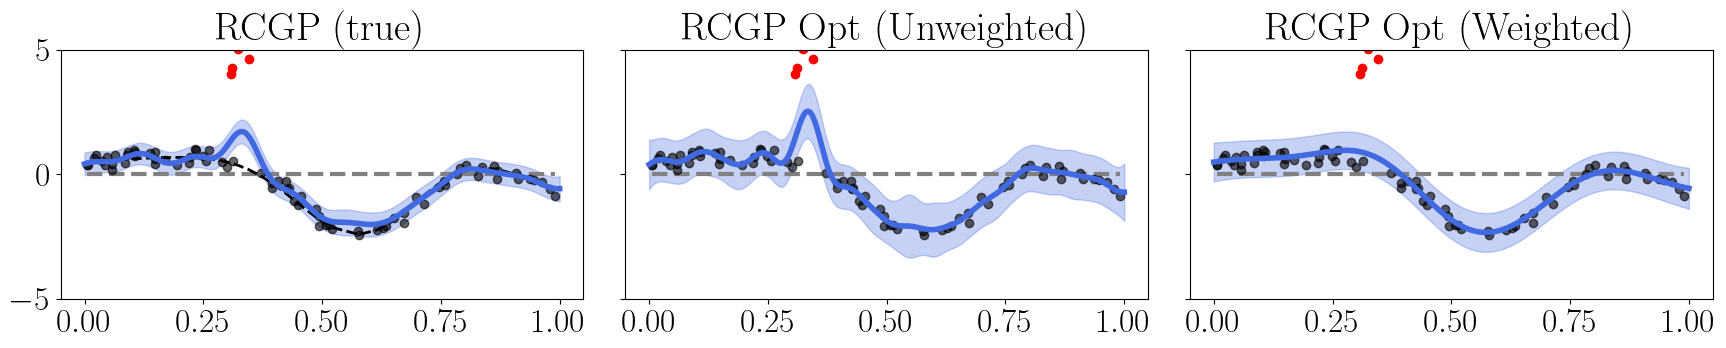

In [182]:
initial_length_scale = 0.04
initial_rbf_variance = 0.1
initial_noise = 0.04

# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# --- Plot 1: RCGP with weighted LOO-CV not optimized ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[0].set_title("RCGP (true)")

# --- Plot 2: RCGP with unweighted LOO-CV optimization ---
rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp.fit(x_train, y_train)
rcgp.optimize_loo_cv(weighted=False, print_opt_param=True, print_iter_param=False)

mu, var = rcgp.predict(x_test)
std = np.sqrt(var + rcgp.noise)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[1].plot(x_test, mu.ravel(), color="royalblue")
axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[1].set_title("RCGP Opt (Unweighted)")

# --- Plot 3: RCGP with weighted LOO-CV optimization ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)
rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=True, print_iter_param=False)

# print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
print('weights:', rcgp_w.weight.reshape(-1)[98:116])

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[2].set_title("RCGP Opt (Weighted)")

# Common settings
for ax in axs:
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()


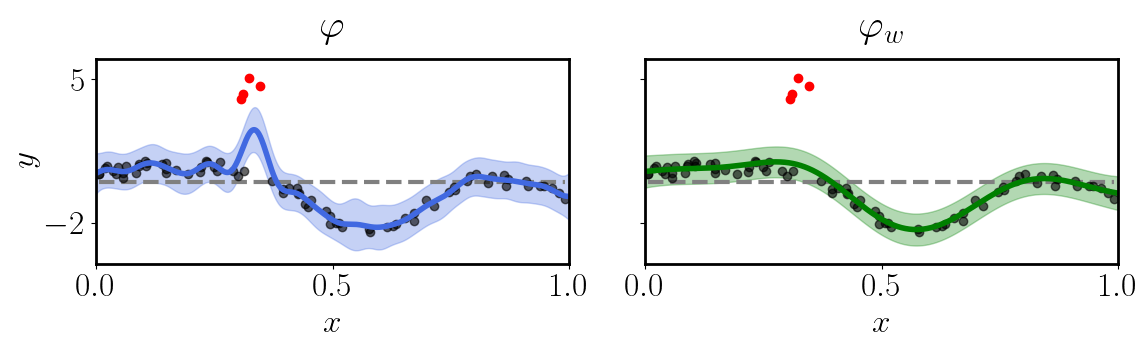

In [ ]:
# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_test, mu.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[0].set_ylabel(r'$y$')
axs[0].set_title(r"$\varphi$", pad=15)

# axs[0].plot(x_test, mu.ravel(), color="royalblue", label=r'RCGP ($\varphi$)')
# axs[0].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[1].plot(x_test, mu_w.ravel(), color="green")
axs[1].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='green')
axs[1].set_title(r"$\varphi_{w}$", pad=15)

# axs[1].plot(x_test, mu_w.ravel(), color="green", label=r'RCGP ($\varphi_w$)')
# axs[1].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)


for ax in axs:
    ax.set_ylim(-4, 6)
    ax.set_xlim(0, 1)
    ax.set_yticks([-2, 5])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xlabel(r'$x$')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
# plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')

## Test

76
Optimized length_scale: 0.3164, noise: 0.114065, rbf_variance: 53.4667
Optimized length_scale: 0.2297, noise: 0.070245, rbf_variance: 8.3382
loo_log: [ 0.29267884  0.31864171  0.32073641 -0.06762547  0.30977972  0.1852317
  0.29752401 -0.45849235  0.13908597  0.23315814  0.26627872  0.25767146
  0.24127011  0.19033453  0.24485226  0.06383779  0.18491047  0.16190998
  0.1600821   0.04609931  0.12853225  0.16920294  0.16396273 -0.14930166
  0.02102448 -0.07213616 -0.10846322 -0.16873106 -0.03750251]
weights: []


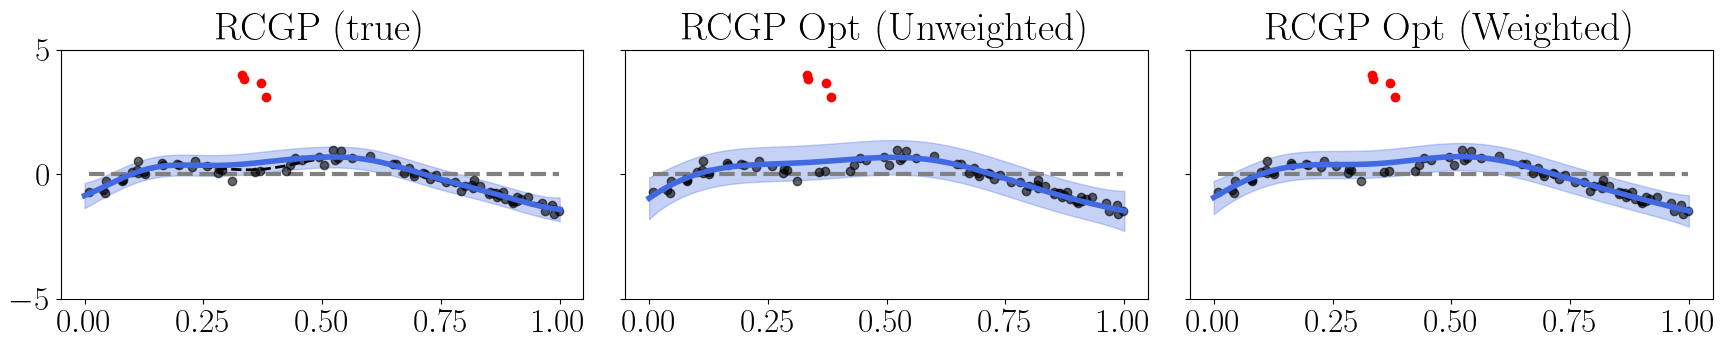

77
Optimized length_scale: 0.1830, noise: 0.134188, rbf_variance: 0.5169
Optimized length_scale: 0.1831, noise: 0.072081, rbf_variance: 0.4191
loo_log: [ 0.2194971   0.17510829 -0.08604091  0.12169214  0.06169856  0.10606088
  0.14518995 -0.29552344  0.2254168  -0.10655103  0.01796329 -0.70183719
  0.25293122 -0.25236829  0.24766167 -0.17725588  0.28021617  0.26644876
  0.30666302  0.27788301 -0.10062783  0.04976957  0.22632024  0.16679968
 -0.210726   -0.27416659  0.1103361  -0.21339323 -0.20103213]
weights: []


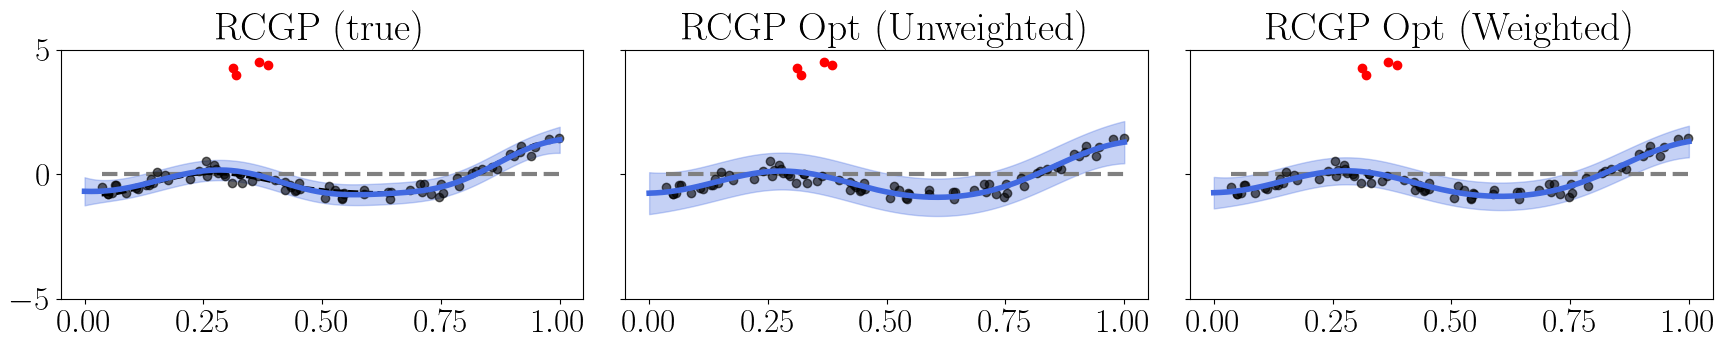

78
Optimized length_scale: 0.1772, noise: 0.207139, rbf_variance: 0.8995
Optimized length_scale: 0.2112, noise: 0.168389, rbf_variance: 1.3218
loo_log: [-0.10177209 -0.11598411 -0.26934856 -0.13404581 -0.19835614 -0.18627027
 -0.19860531 -0.22388397 -0.25937247 -0.28309231 -0.29224295 -0.35416269
 -0.3108858  -0.3422689  -0.41357785 -0.26944866 -0.43622512 -0.28965497
 -0.22938027 -0.3527709  -0.20740564 -0.21704987 -0.35075665 -0.1984251
 -0.61360611 -0.1837179  -0.24391877 -0.42168878 -0.19232316]
weights: []


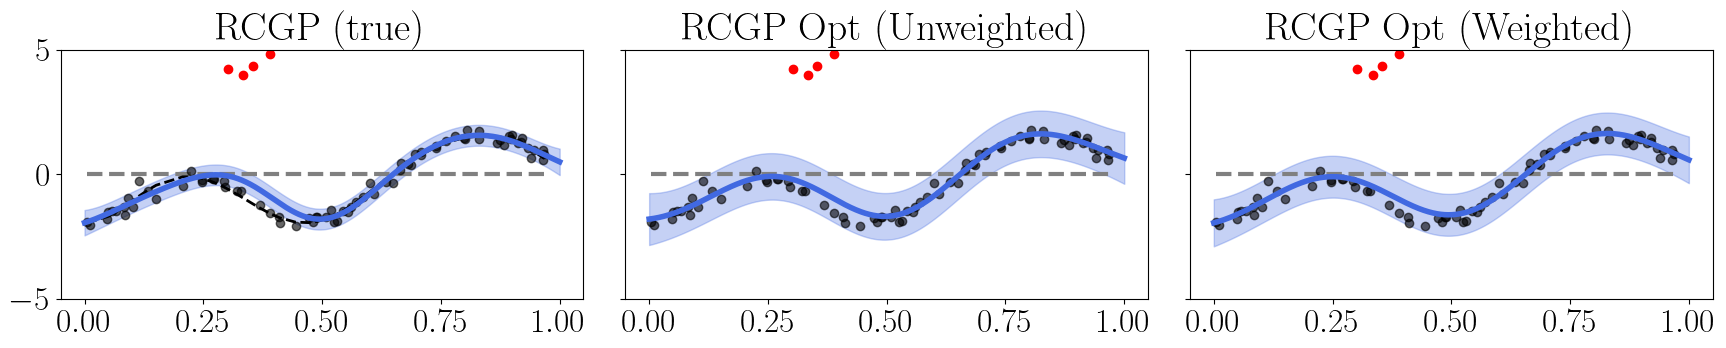

79
Optimized length_scale: 0.0227, noise: 0.064097, rbf_variance: 3.0063
Optimized length_scale: 0.0710, noise: 0.153018, rbf_variance: 0.2579
loo_log: [-0.58302965 -0.18604469 -0.13414042 -0.28303083 -0.10441847 -0.15767999
 -0.14381774 -0.27897156 -0.06697711 -0.25327712 -0.16019692 -0.29676953
 -0.05314483 -0.05843558 -0.58689822 -0.11965874 -0.21951108 -0.06381623
 -0.22001243 -0.1083285  -0.23822107 -0.18806435 -0.15491848 -0.11178688
 -0.12307659 -0.24509928 -0.21368995 -0.1370539  -0.30394483]
weights: []


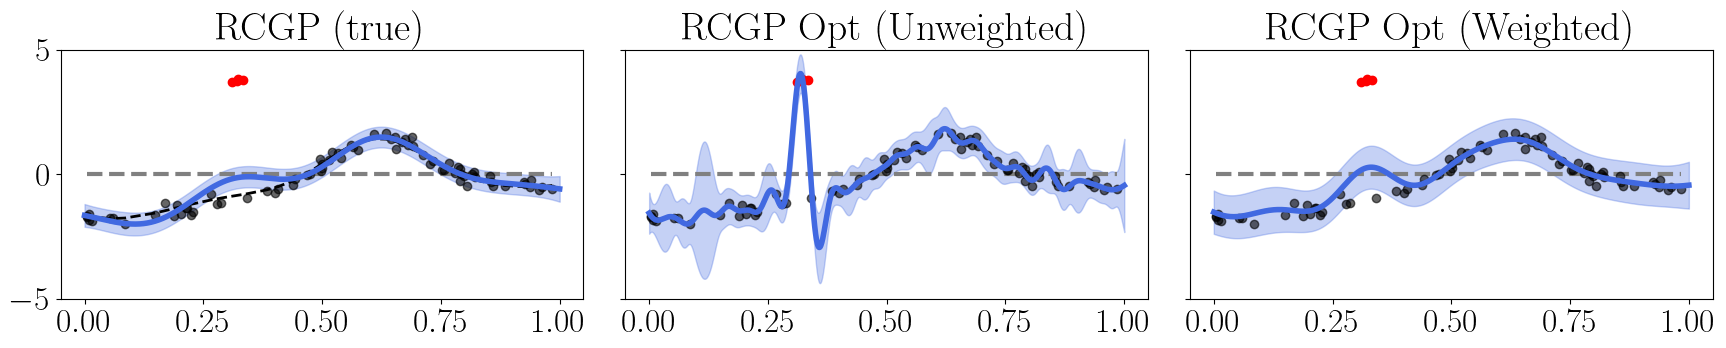

80
Optimized length_scale: 0.0259, noise: 0.034141, rbf_variance: 1.0466
Optimized length_scale: 0.0275, noise: 0.036267, rbf_variance: 0.7633
loo_log: [-0.77223432  0.3831485   0.35744397 -0.29145868  0.41671755 -1.35196329
 -0.73773132 -0.21941574 -0.74397527  0.26374304  0.43443262  0.14138604
  0.18142817  0.26321121  0.18499974  0.09623655  0.37536624  0.42571899
  0.42788244 -0.06409136  0.09049473  0.06835368 -0.20863915  0.39113057
  0.51875354  0.29166355  0.47942706 -0.19311618 -1.21061521]
weights: []


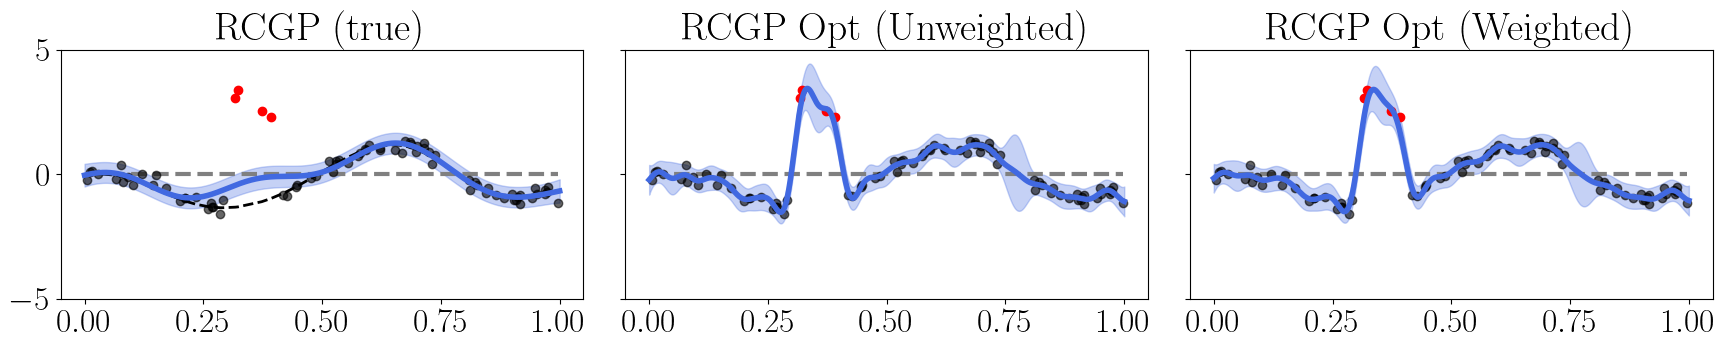

81
Optimized length_scale: 0.0865, noise: 0.186132, rbf_variance: 0.0981
Optimized length_scale: 0.1208, noise: 0.112266, rbf_variance: 0.1656
loo_log: [ 1.21344670e-02  1.75847191e-02 -1.05651485e-02 -7.19364408e-01
  5.05842822e-02  8.10357263e-02 -7.60093255e-02  5.31080908e-02
 -1.63201196e-01  7.76261725e-02  6.00960534e-02  7.62352146e-02
  3.67536429e-04 -2.67509402e-02 -8.38614165e-02 -4.06260545e-02
  6.55334020e-02 -5.63875036e-02  7.70474043e-02 -6.70551717e-02
  7.82276501e-02 -3.51206376e-02  4.07716157e-02  6.73754523e-03
 -6.41226681e-02 -1.88719384e-02 -4.34307478e-01  5.60051183e-02
 -5.70482479e-02]
weights: []


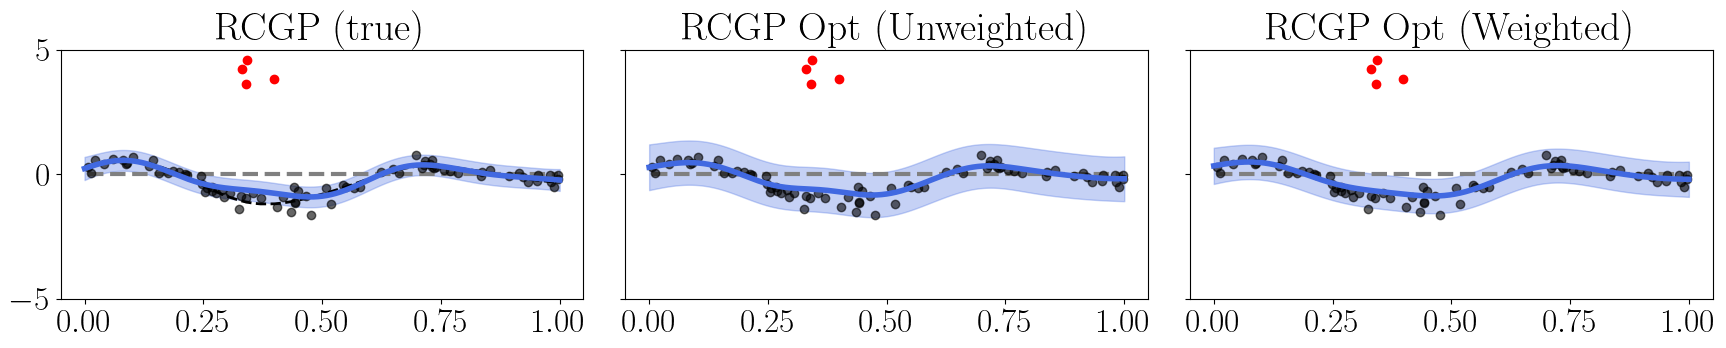

82
Optimized length_scale: 0.1277, noise: 0.176336, rbf_variance: 0.1156
Optimized length_scale: 0.1575, noise: 0.110562, rbf_variance: 0.2863
loo_log: [-1.06965106  0.10266077  0.06560782  0.04768805  0.10512301  0.0531345
  0.09337354 -0.0957068  -0.02739118 -0.5148423  -0.38130623  0.04568122
  0.08291714 -0.21757069 -0.02170625 -0.17866455  0.0885183  -0.00723846
  0.01072182 -0.10549101 -0.42784947 -0.09885472  0.08776594 -0.38044929
 -0.13911168  0.06620395 -0.14887783 -0.02670326  0.00407979]
weights: []


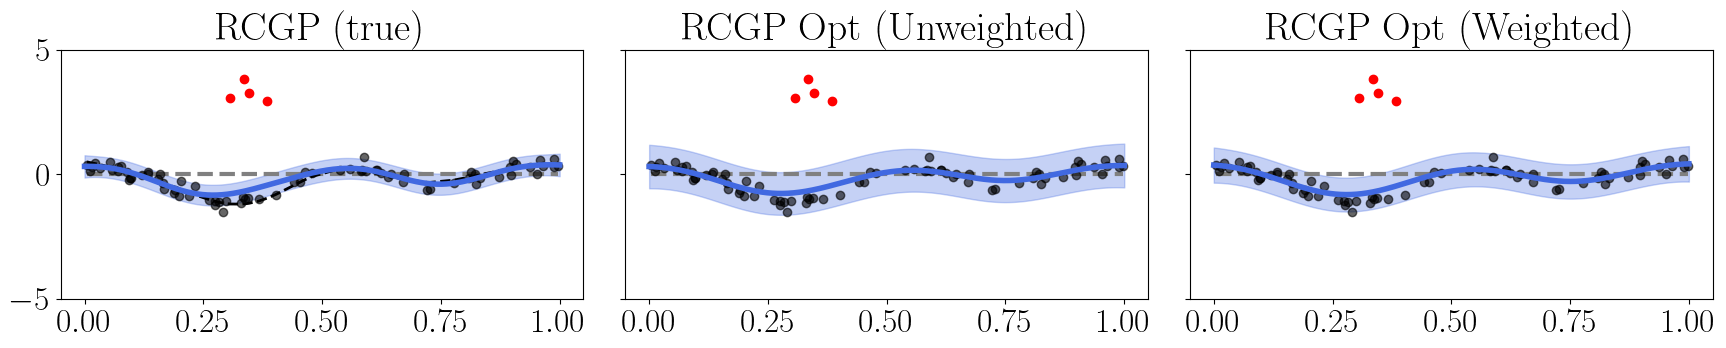

83
Optimized length_scale: 0.1517, noise: 0.079384, rbf_variance: 0.0565
Optimized length_scale: 0.1606, noise: 0.055191, rbf_variance: 0.0327
loo_log: [-1.50881249  0.09404044  0.27478255  0.0120002   0.46673728  0.29450677
 -0.81922117  0.32104001 -1.93416888  0.41318066  0.2705033   0.11446696
  0.32293243 -0.18936776  0.00231382  0.13017731 -0.1779613   0.29407661
 -0.86994148  0.19723134 -0.48642883 -0.87187379  0.33896044  0.33265235
  0.22648892  0.36939945  0.31679723  0.36810686 -0.13862624]
weights: []


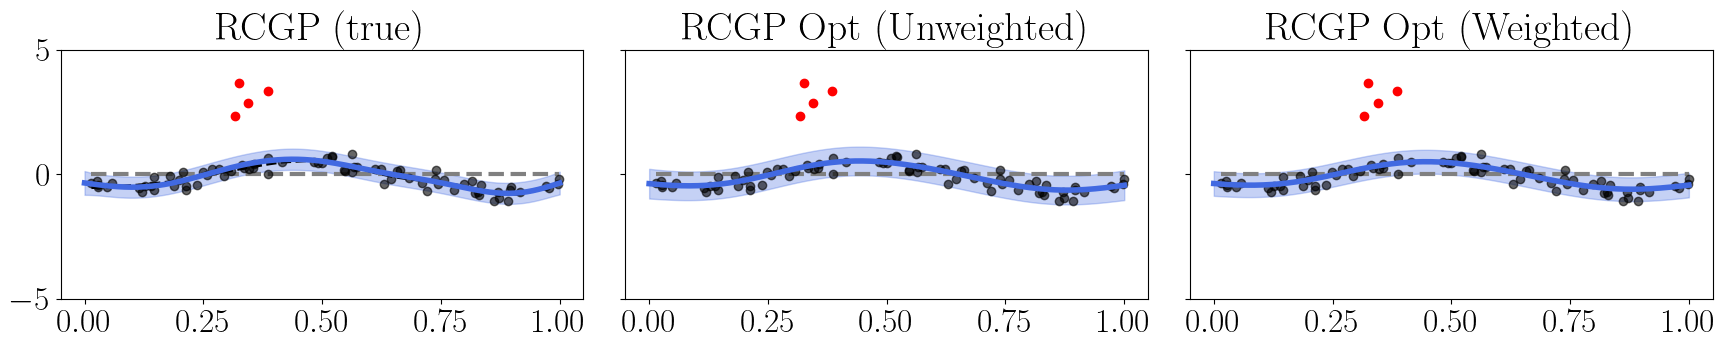

84
Optimized length_scale: 0.0552, noise: 0.096819, rbf_variance: 0.1331
Optimized length_scale: 0.0659, noise: 0.075057, rbf_variance: 0.0864
loo_log: [-0.05832584  0.07863738 -0.43324693  0.13804662  0.12363219 -0.09887587
  0.21380279  0.23090931  0.00260272 -0.08083659  0.17877825  0.17435836
 -0.36481343  0.09345275 -0.31402903  0.26214507 -0.1033627   0.11833121
 -0.04492713  0.05983606 -0.02767556 -0.07832269 -1.11615891  0.09860818
  0.03264186  0.01458923  0.1296105   0.06550235 -0.37317792]
weights: []


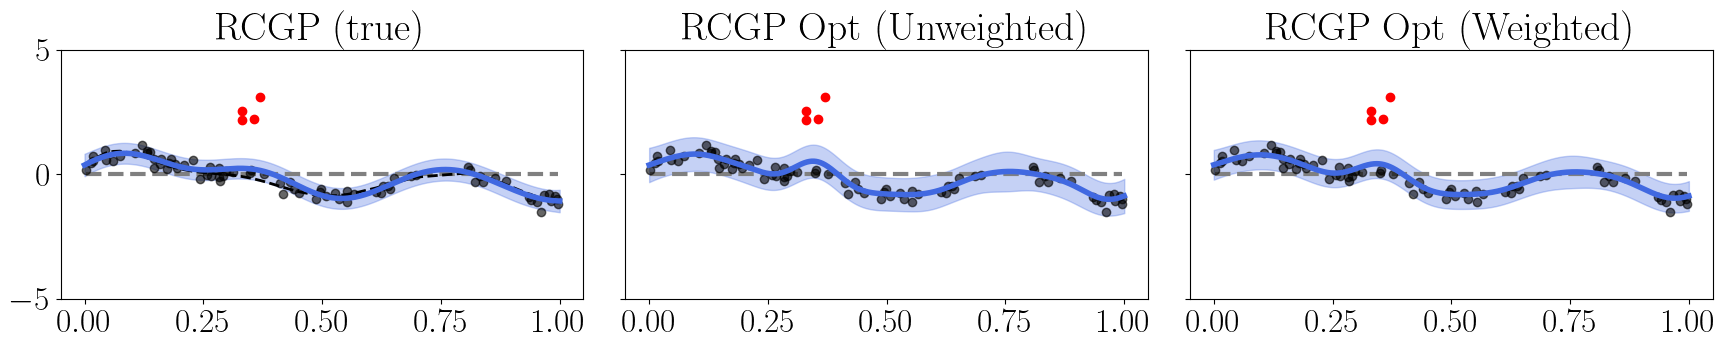

85
Optimized length_scale: 0.1136, noise: 0.089532, rbf_variance: 0.0631
Optimized length_scale: 0.1044, noise: 0.058253, rbf_variance: 0.0412
loo_log: [ 0.44237331  0.30325653  0.20093242  0.21839866 -0.29072121  0.29105632
  0.07373358 -0.77636965 -0.80140408  0.3795691   0.33123611 -0.20794616
 -0.29785162 -0.14325054 -0.9852199   0.21593019  0.21780204  0.22945748
  0.35764922  0.37469307  0.37640232 -0.27109211 -0.55573294  0.36119312
 -0.093441    0.37643745 -1.80609734  0.08153086  0.05037664]
weights: []


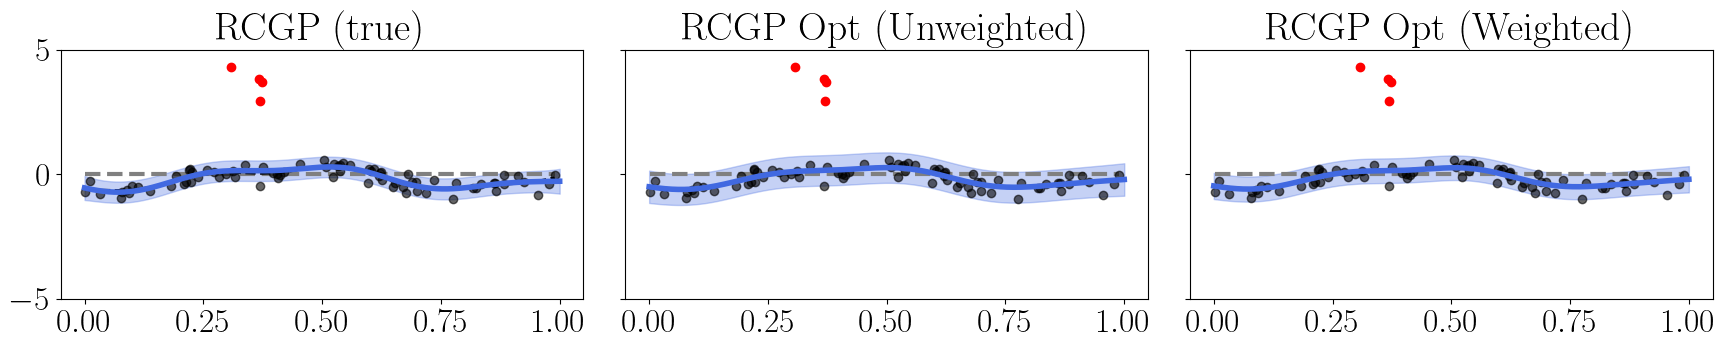

86
Optimized length_scale: 0.0572, noise: 0.205671, rbf_variance: 0.5903
Optimized length_scale: 0.0724, noise: 0.175310, rbf_variance: 0.3174
loo_log: [-0.40992028 -0.39871765 -0.34527673 -0.29822957 -0.26347387 -0.16917515
 -0.2278744  -0.19580195 -0.39989809 -0.16760756 -0.57692203 -0.13443521
 -0.15540998 -0.19671332 -0.42954565 -0.11938246 -0.15268503 -0.51904579
 -1.1495144  -0.23361517 -0.12893846 -0.18237508 -0.19321147 -0.5897077
 -0.25765677 -0.26849739 -0.57706718 -0.4174525  -0.24533175]
weights: []


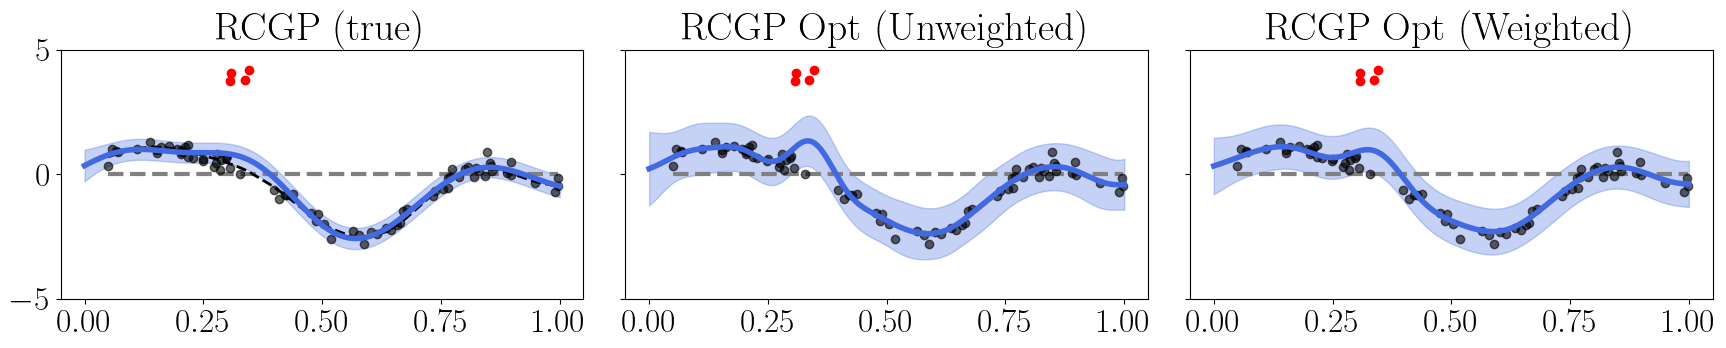

87
Optimized length_scale: 0.0986, noise: 0.092747, rbf_variance: 0.0922
Optimized length_scale: 0.1161, noise: 0.054333, rbf_variance: 0.0700
loo_log: [ 0.27757418  0.04793502  0.31649792  0.22331583  0.17941017 -0.40855677
  0.26410281  0.44025876  0.22684078  0.45832715  0.10982404  0.37743477
  0.44623138 -1.21165454 -0.59828116  0.11799511  0.2384435  -0.59873271
  0.19874039  0.38697837 -0.98980281  0.44580325  0.38525103  0.46237814
 -0.49115012  0.3600597   0.40754145  0.25944247  0.36608545]
weights: []


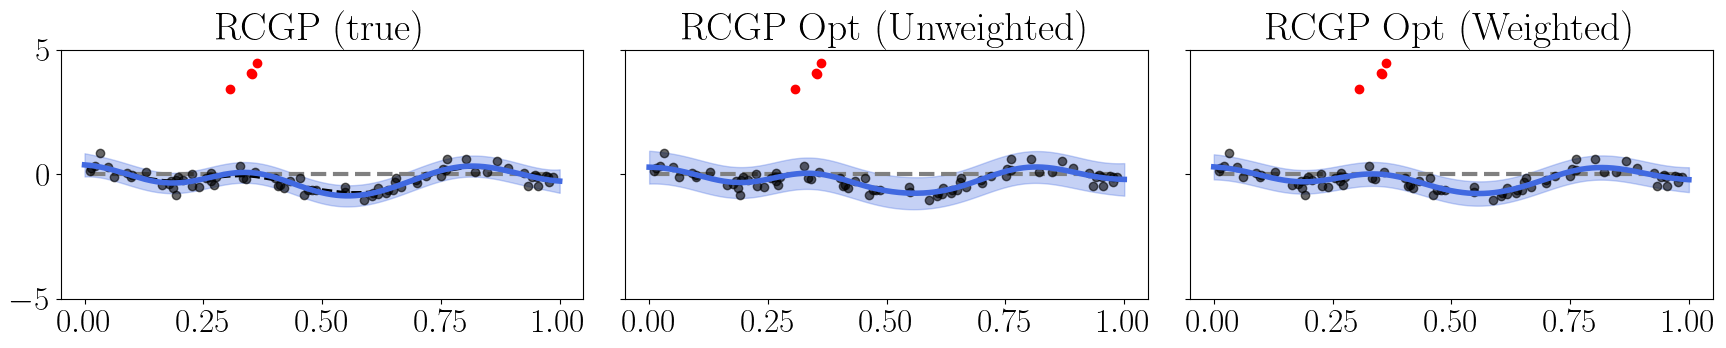

88
Optimized length_scale: 0.0994, noise: 0.126031, rbf_variance: 0.2272
Optimized length_scale: 0.1189, noise: 0.092156, rbf_variance: 0.1258
loo_log: [ 0.05955172  0.13008416  0.12030504  0.18548873 -0.15031193  0.15036151
  0.15068169  0.19336572  0.17505154 -0.18574439  0.17080832  0.18328226
  0.14152056  0.16615351  0.0807108  -0.55915137 -0.91160818  0.07489153
  0.042846    0.17038465  0.18802203  0.1846109   0.19096762  0.19229378
  0.13177078  0.16733576 -0.03783743  0.14076186 -0.39925295]
weights: []


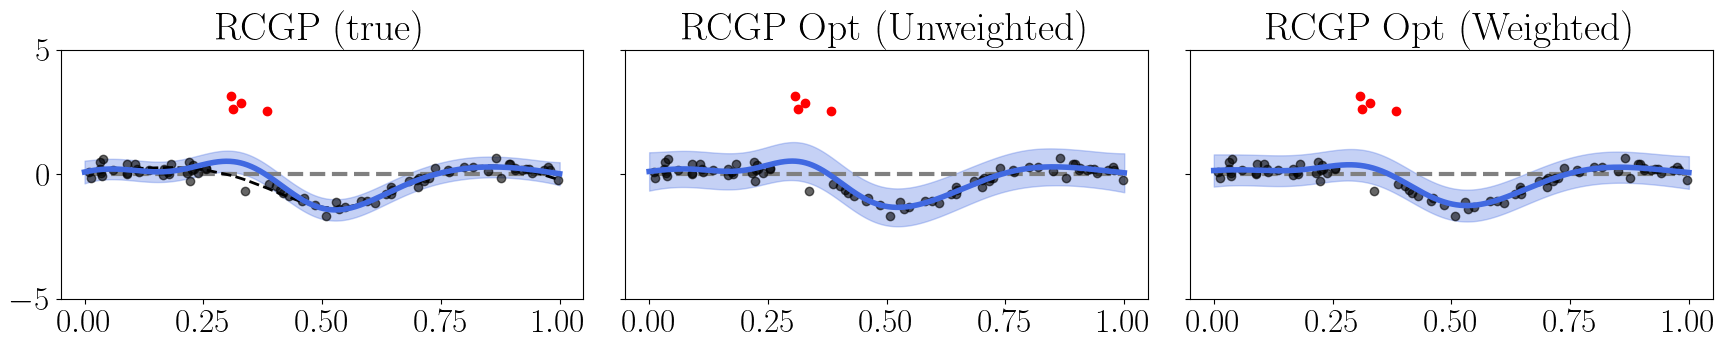

89
Optimized length_scale: 0.0735, noise: 0.194180, rbf_variance: 0.2125
Optimized length_scale: 0.1505, noise: 0.129917, rbf_variance: 0.3056
loo_log: [-0.06482502 -0.05339003 -0.08668167 -0.22960365 -0.23966746 -0.2208294
 -0.27032126 -0.0068219  -0.22133995 -0.0323491   0.00858857 -0.2259015
  0.00486333 -0.1979013   0.00993422 -0.14364452 -0.96395755 -0.04956411
 -0.0060794  -0.05638434 -0.07090368 -0.1561756  -0.06347139 -0.59473411
 -0.41227107 -0.0827079  -0.07778843 -0.06341669 -0.08306913]
weights: []


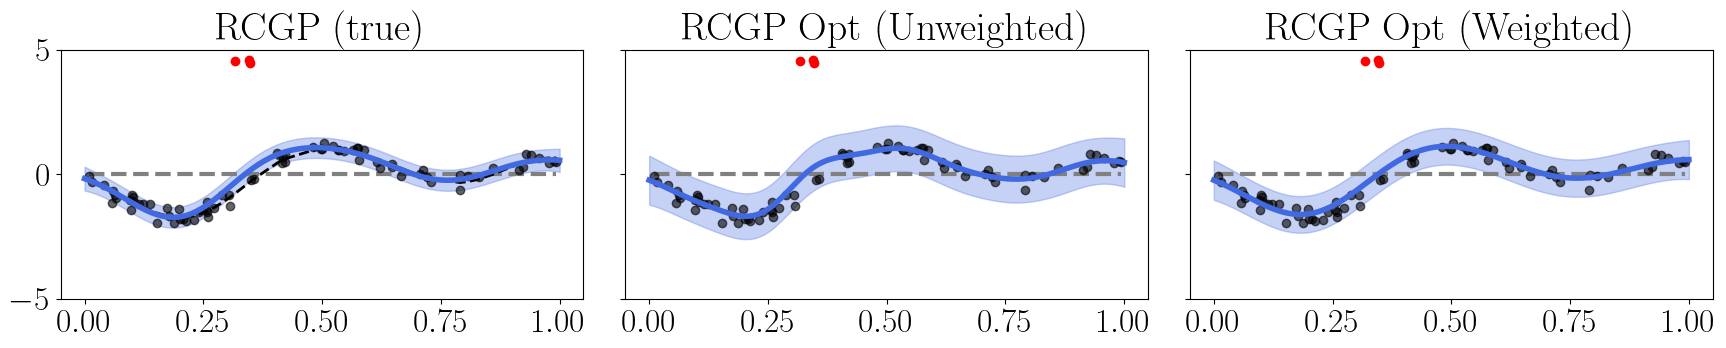

90
Optimized length_scale: 0.0414, noise: 0.032547, rbf_variance: 7.3819
Optimized length_scale: 0.0313, noise: 0.035086, rbf_variance: 0.2701
loo_log: [-1.70386582 -2.02435351 -0.65632395  0.15083377 -0.32756895  0.46021304
 -0.96692638  0.31370746  0.28286483  0.39084564  0.17657456  0.3674624
  0.16374137  0.11997702 -0.03540482  0.31280972  0.43477133  0.18046646
  0.2695237   0.39624897  0.34424918  0.24868945  0.18377453  0.14302121
  0.36047956 -0.11857831 -0.31128449 -0.21442229 -0.21036968]
weights: []


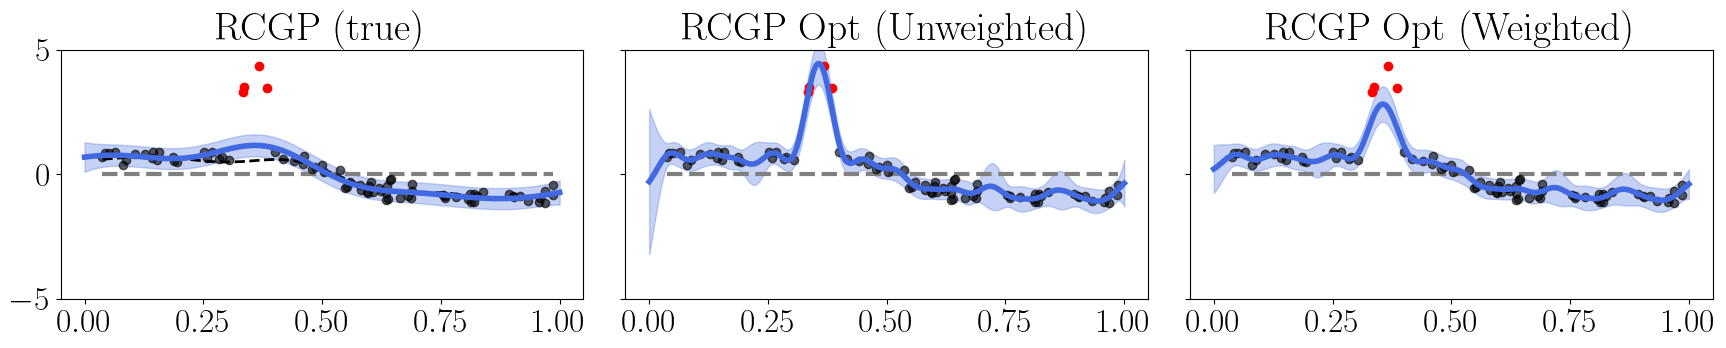

91
Optimized length_scale: 0.0545, noise: 0.140620, rbf_variance: 0.1293
Optimized length_scale: 0.0608, noise: 0.084270, rbf_variance: 0.1463
loo_log: [ 2.09138425e-01  2.16027136e-01 -1.62938966e-01  1.44208717e-01
  1.66594079e-01 -6.90581956e-03  3.17545779e-02 -7.99964859e-01
  2.08274439e-01  1.83523076e-01  1.43085439e-01  9.54845474e-02
 -4.65548160e-01 -4.61149843e-01 -6.80678707e-02  1.91294175e-03
 -3.34862309e-01  6.74397576e-02 -1.72849904e-01  1.09774329e-01
  1.40472322e-01 -4.09900775e-04 -1.29859020e-01  5.52300996e-03
  4.23195348e-02 -5.63801910e-01 -9.71481058e-02 -1.00921728e-01
 -7.73191143e-01]
weights: []


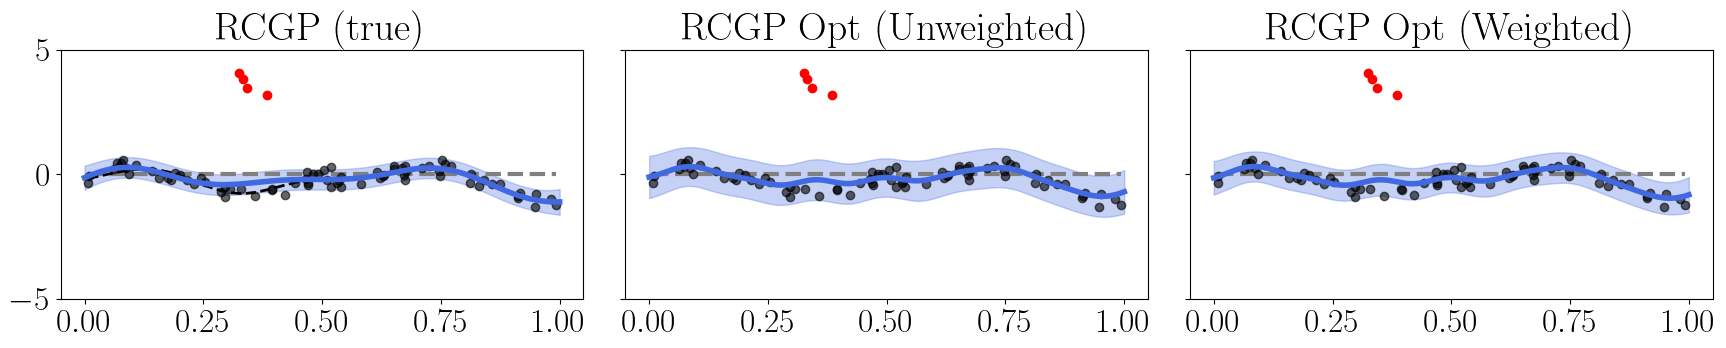

92
Optimized length_scale: 0.1024, noise: 0.081966, rbf_variance: 0.0522
Optimized length_scale: 0.1462, noise: 0.044871, rbf_variance: 0.0792
loo_log: [ 0.46666023  0.55823639  0.50014779  0.52844764  0.38757101  0.5409652
  0.31058389  0.30293461 -1.25895433 -0.02573965  0.54369629  0.2499236
  0.12183321 -0.39595702 -1.66056014  0.4138441   0.391286    0.58173072
  0.56921941  0.03810599  0.56472151  0.57688395  0.36113508  0.40575896
  0.54672676 -0.949995    0.47945856  0.35675183  0.36283368]
weights: []


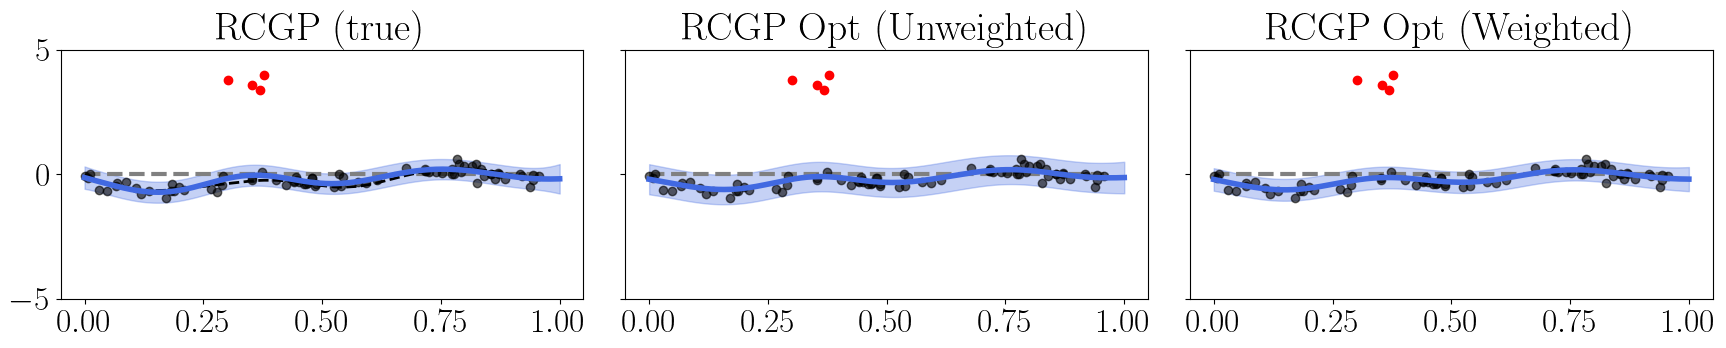

93
Optimized length_scale: 0.0467, noise: 0.074281, rbf_variance: 13.2888
Optimized length_scale: 0.0478, noise: 0.074130, rbf_variance: 0.1848
loo_log: [-0.38456947 -0.15372228 -0.37096262  0.16038838  0.1020819   0.11799981
 -0.09053562  0.14327512  0.0904232   0.06492294  0.19299028 -0.02449686
  0.10132425 -0.15498258  0.00156775  0.08236717  0.19909933 -0.02432665
  0.10909654  0.04601183  0.08317452 -0.0919022  -0.13633123 -0.11531834
  0.08267736  0.01098408 -0.14398709 -0.03666415 -1.56534524]
weights: []


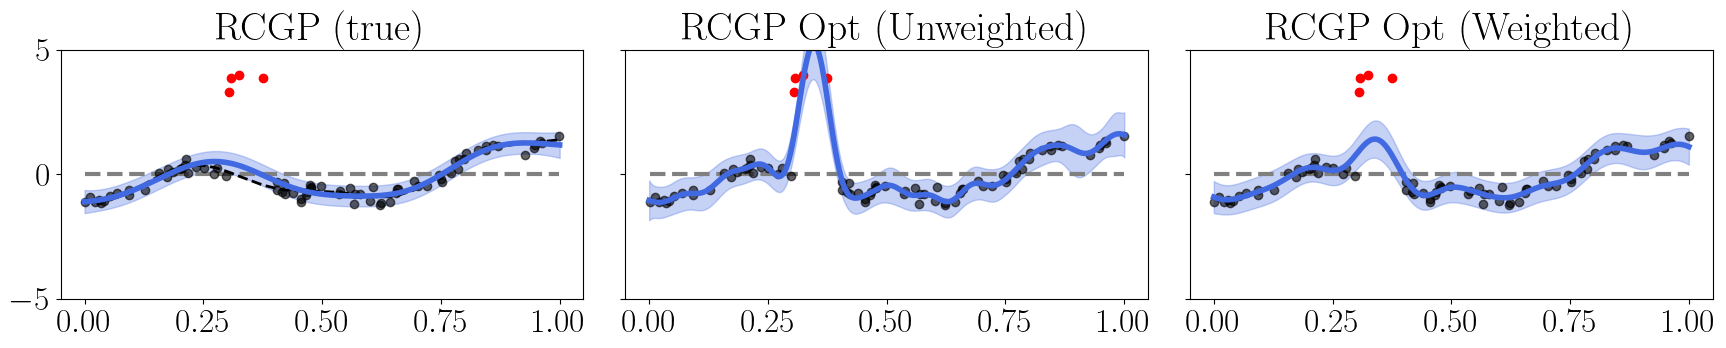

94
Optimized length_scale: 0.1201, noise: 0.204795, rbf_variance: 0.1626
Optimized length_scale: 0.1577, noise: 0.155182, rbf_variance: 0.3117
loo_log: [-0.14572312 -0.25510884 -0.15370024 -0.65626802 -0.61745662 -0.10467774
 -0.09499084 -0.23260949 -0.80866346 -0.43263067 -0.13859374 -0.09280059
 -0.34326694 -0.09876022 -0.11709739 -0.66036933 -0.56321739 -0.38409605
 -0.43876617 -0.46329854 -0.10547777 -0.34163942 -0.66682716 -0.14940213
 -0.52830809 -0.13512926 -0.15257003 -0.18587999 -0.28219721]
weights: []


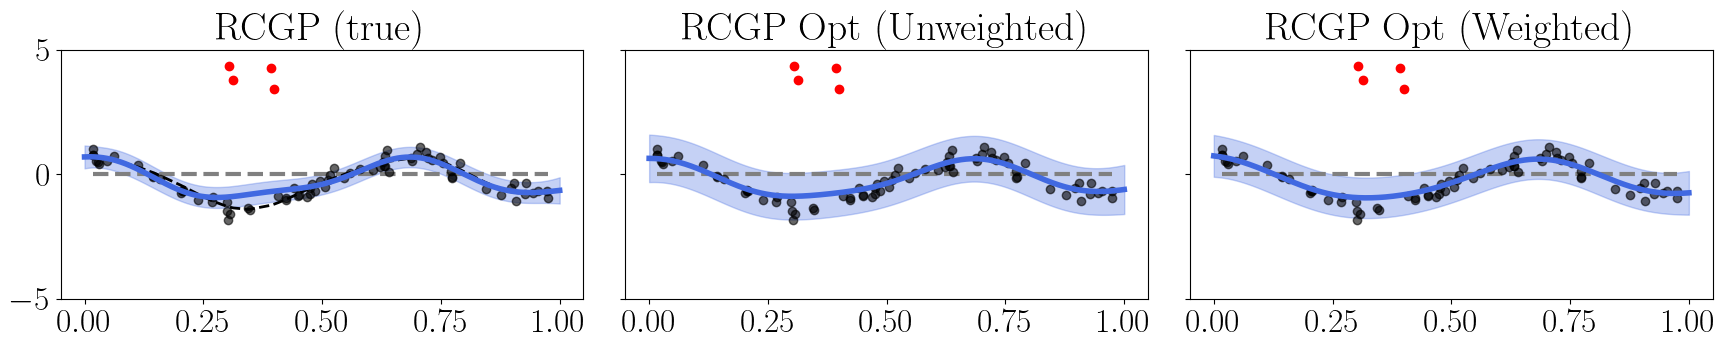

95
Optimized length_scale: 0.0734, noise: 0.220225, rbf_variance: 0.2801
Optimized length_scale: 0.0992, noise: 0.211278, rbf_variance: 0.3927
loo_log: [-0.23822232 -0.21178815 -0.23476252 -0.24705517 -0.28870034 -0.27133637
 -0.33462953 -0.27145064 -0.45857752 -0.54179303 -0.29340686 -0.27663535
 -0.28434263 -0.32008133 -0.2579857  -0.35396645 -0.2518233  -0.32554011
 -0.40237211 -0.25504353 -0.2404609  -0.38598134 -0.33237241 -0.24780529
 -0.43604192 -0.24853502 -0.38323724 -0.28630412 -0.29622403]
weights: []


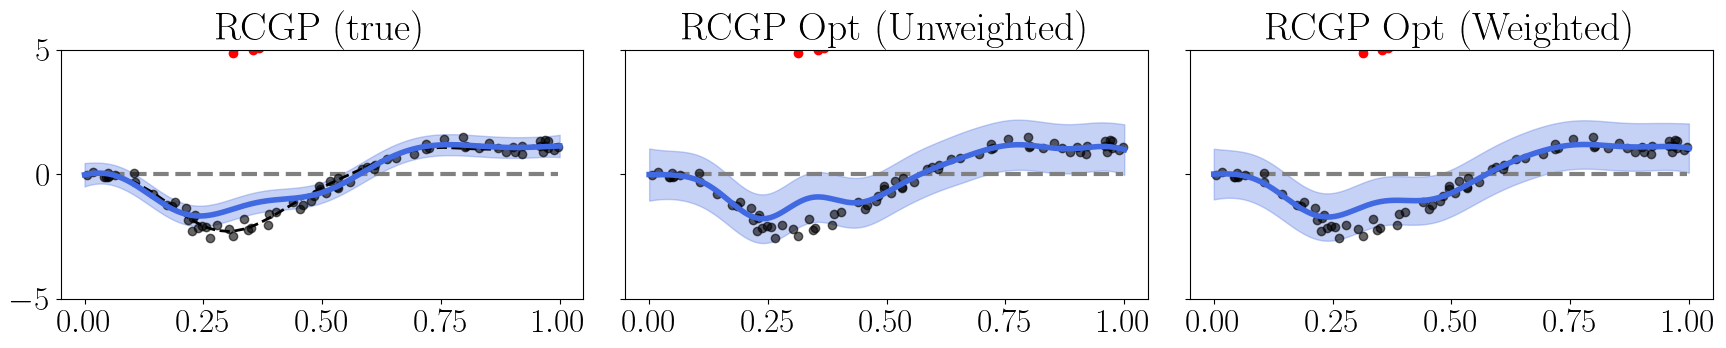

96
Optimized length_scale: 0.1222, noise: 0.129148, rbf_variance: 0.2964
Optimized length_scale: 0.1171, noise: 0.083488, rbf_variance: 0.1701
loo_log: [ 0.09001661  0.05590375  0.08935431  0.08575039 -0.18718856  0.06832627
 -0.93925907 -0.16904621  0.01641962 -0.29889818 -0.22467209  0.166343
  0.04034873  0.18294676 -0.26704221  0.1011732   0.09580548 -0.19097936
 -0.56840751 -1.12546379  0.04557536  0.16107431 -0.00264603  0.192155
  0.03246179  0.05647424 -0.23978284 -0.00134381 -0.36422262]
weights: []


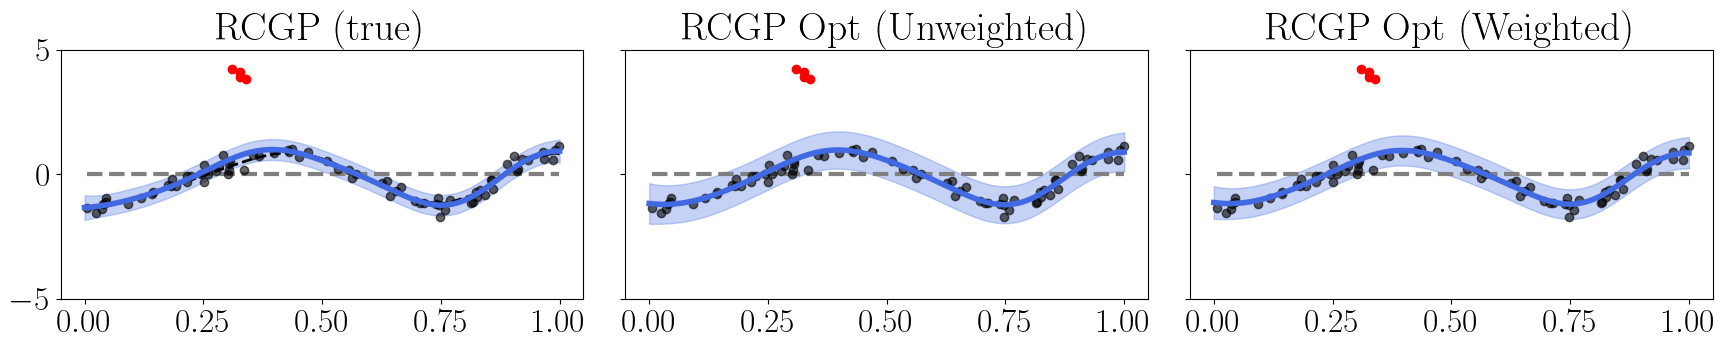

97
Optimized length_scale: 0.0118, noise: 0.063002, rbf_variance: 0.7445
Optimized length_scale: 0.0615, noise: 0.138211, rbf_variance: 0.1064
loo_log: [-0.05026407 -0.03528462 -0.06063483 -0.07688631 -0.44080747 -0.09011674
 -0.09069401 -0.05972296 -0.1537283  -0.06520509 -0.08299811 -0.13273887
 -0.36436018 -0.045743   -0.11639526 -0.04680723 -0.43858463 -0.08085847
 -0.3389821  -0.23699673 -0.1639837  -0.07529627 -0.10856005 -0.05098969
 -0.3347293  -0.48146797 -0.05547969 -0.29017084 -0.09520786]
weights: []


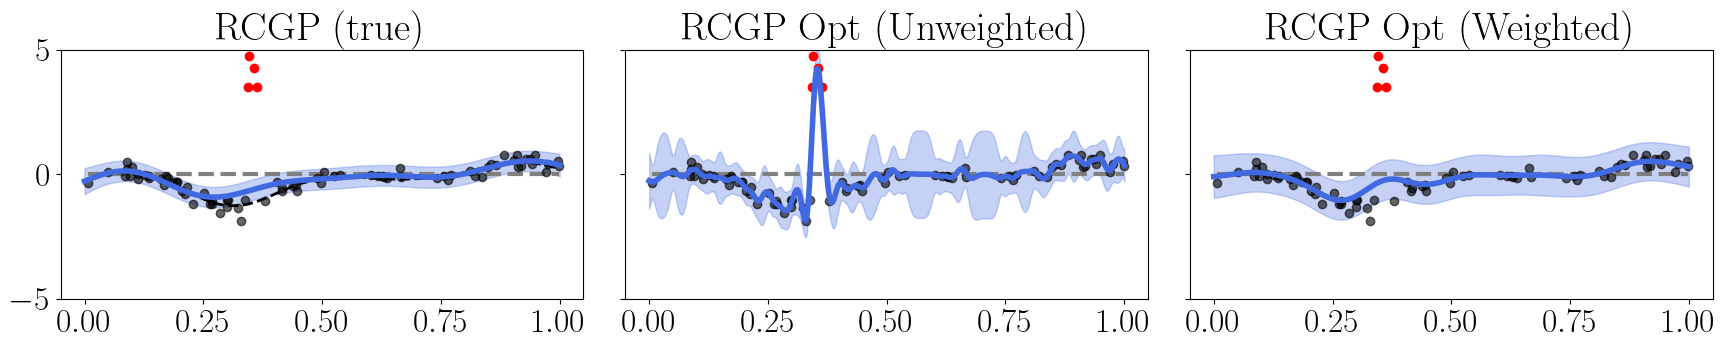

98
Optimized length_scale: 0.1323, noise: 0.125543, rbf_variance: 0.3580
Optimized length_scale: 0.1299, noise: 0.081291, rbf_variance: 0.3420
loo_log: [ 0.0557688  -0.08707915  0.21129027  0.08862459 -0.08706309  0.20890401
  0.12110014  0.09224831 -0.14087756 -0.45073854  0.06529184 -0.07298197
  0.02798823  0.02533213 -0.14032666 -0.38333885  0.09559453  0.01096955
  0.17990894 -0.56402948  0.1670178  -0.4794327  -0.35954315  0.02697047
  0.07183008 -0.05077845 -0.05955999 -0.04160668  0.02555921]
weights: []


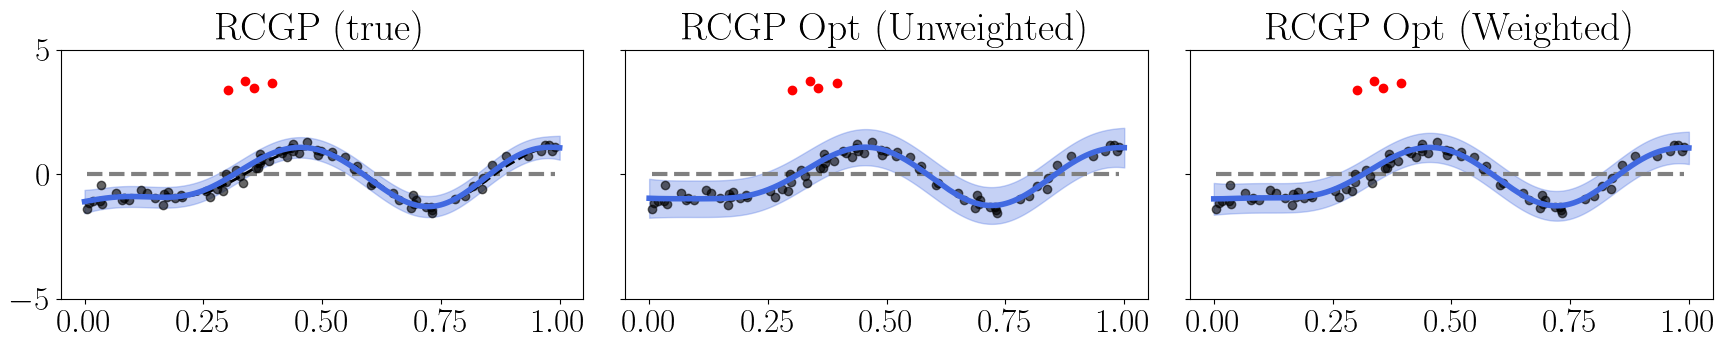

99
Optimized length_scale: 0.0703, noise: 0.225555, rbf_variance: 0.4148
Optimized length_scale: 0.1902, noise: 0.214599, rbf_variance: 0.3557
loo_log: [-0.30134398 -0.21153085 -0.34648765 -0.39689451 -0.2139147  -0.3830812
 -0.67228512 -0.22901141 -0.27983704 -0.29297247 -0.46201137 -0.37236875
 -0.31621649 -0.53514363 -0.25125974 -0.24258583 -0.33372205 -0.28083038
 -0.34801021 -0.26932402 -0.27469002 -0.2613546  -0.39105261 -0.26413845
 -0.45211327 -0.2884049  -0.37867327 -0.35781741 -0.3005513 ]
weights: []


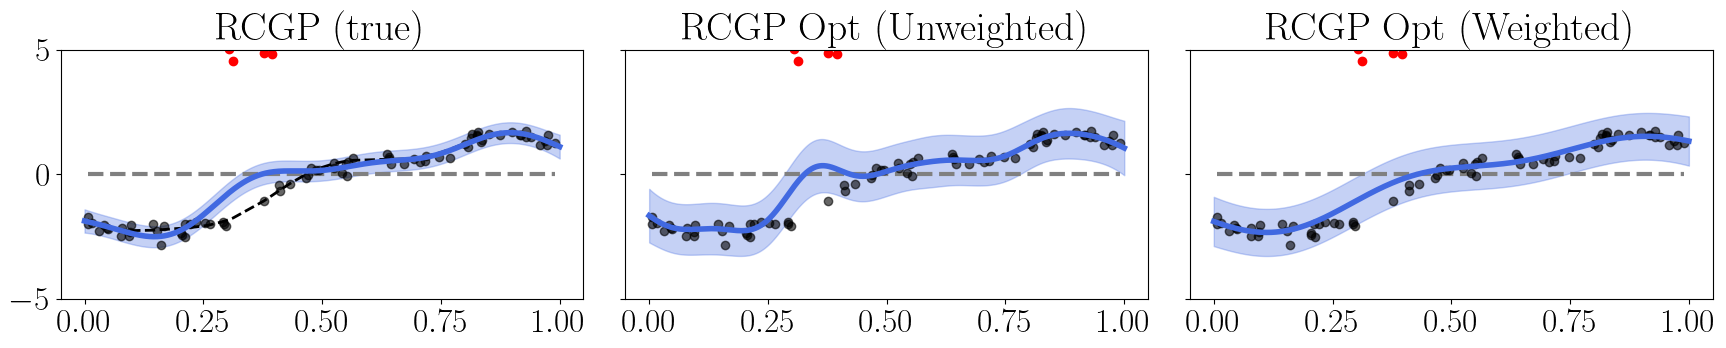

In [ ]:
initial_length_scale = 0.04
initial_rbf_variance = 0.1
initial_noise = 0.04

# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# --- Plot 1: RCGP with weighted LOO-CV not optimized ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[0].set_title("RCGP (true)")

# --- Plot 2: RCGP with unweighted LOO-CV optimization ---
rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp.fit(x_train, y_train)
rcgp.optimize_loo_cv(weighted=False, print_opt_param=True, print_iter_param=False)

mu, var = rcgp.predict(x_test)
std = np.sqrt(var + rcgp.noise)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[1].plot(x_test, mu.ravel(), color="royalblue")
axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[1].set_title("RCGP Opt (Unweighted)")

# --- Plot 3: RCGP with weighted LOO-CV optimization ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)
rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=True, print_iter_param=False)

# print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
print('weights:', rcgp_w.weight.reshape(-1)[98:116])

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[2].set_title("RCGP Opt (Weighted)")

# Common settings
for ax in axs:
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()
